#Our Spofity Project

Welcome to our project.

Our project ID is 95.

Group members:

-Selin Keleş

-İbrahim Mert Polat

-Ufuk Atay

In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

# to be used as a prefix for all file I/O
path_prefix = "./drive/My Drive"

Mounted at ./drive


In [ ]:
import pandas as pd  # an alias for pandas
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import plotly.express as px
import seaborn as sns
from scipy import stats
from scipy import special
from plotly.subplots import make_subplots
%matplotlib inline

##Introduction
In this notebook, we attempt to analyse different features of the most popular artists and songs and how songs of different genres change over time with some observative visualizations. 

For the analysis we use Spotify Dataset 1921-2020.
Data contains over 170 thousand tracks.

###Utilized Datasets

data.csv

data_w_genres.csv

data_by_genres.csv

data_by_year.csv

##Exploratory Data Analysis

Let's read our data:

In [ ]:
fname = "data.csv"
df = pd.read_csv(join(path_prefix, fname))

In [ ]:
df.shape

(174389, 19)

So, our datsaset consists of 174389 different values and 19 different features.

Let's quickly look at the main structure of the data:

In [ ]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


As we can see from the data 'acousticness', 'danceability', 'energy', 'instrumentalness' and 'liveness' are the features that take value between 0 and 1.
 

In [ ]:
df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

The dataset has no missing values as we can see from the table above.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

Then, let's see how numeric variables are distributed:

In [ ]:
df.drop(['key','mode','year','explicit','id','artists','name'],axis=1).describe().transpose().sort_index()

,count,mean,std,min,25%,50%,75%,max
acousticness,174389.0,0.499228,0.379936,0.0,0.0877,0.517000,0.8950,0.996
danceability,174389.0,0.536758,0.176025,0.0,0.4140,0.548000,0.6690,0.988
duration_ms,174389.0,232810.032026,148395.797680,4937.0,166133.0000,205787.000000,265720.0000,5338302.000
energy,174389.0,0.482721,0.272685,0.0,0.2490,0.465000,0.7110,1.000
instrumentalness,174389.0,0.197252,0.334574,0.0,0.0000,0.000524,0.2520,1.000
liveness,174389.0,0.211123,0.180493,0.0,0.0992,0.138000,0.2700,1.000
loudness,174389.0,-11.750865,5.691591,-60.0,-14.9080,-10.836000,-7.4990,3.855
popularity,174389.0,25.693381,21.872740,0.0,1.0000,25.000000,42.0000,100.000
speechiness,174389.0,0.105729,0.182260,0.0,0.0352,0.045500,0.0763,0.971
tempo,174389.0,117.006500,30.254178,0.0,93.9310,115.816000,135.0110,243.507


For our design, we decided to change the duration from miliseconds to seconds.

In [ ]:
df['duration'] = df['duration_ms'].apply(lambda x:round(x/1000))
df.drop('duration_ms',axis=1,inplace=True)

In [ ]:
df.drop(['key','mode','year','explicit','id','artists','name'],axis=1).describe().transpose().sort_index()

,count,mean,std,min,25%,50%,75%,max
acousticness,174389.0,0.499228,0.379936,0.0,0.0877,0.517000,0.8950,0.996
danceability,174389.0,0.536758,0.176025,0.0,0.4140,0.548000,0.6690,0.988
duration,174389.0,232.808325,148.395277,5.0,166.0000,206.000000,266.0000,5338.000
energy,174389.0,0.482721,0.272685,0.0,0.2490,0.465000,0.7110,1.000
instrumentalness,174389.0,0.197252,0.334574,0.0,0.0000,0.000524,0.2520,1.000
liveness,174389.0,0.211123,0.180493,0.0,0.0992,0.138000,0.2700,1.000
loudness,174389.0,-11.750865,5.691591,-60.0,-14.9080,-10.836000,-7.4990,3.855
popularity,174389.0,25.693381,21.872740,0.0,1.0000,25.000000,42.0000,100.000
speechiness,174389.0,0.105729,0.182260,0.0,0.0352,0.045500,0.0763,0.971
tempo,174389.0,117.006500,30.254178,0.0,93.9310,115.816000,135.0110,243.507


###Example visualizations of aggregated forms based on features

In [ ]:
fname4= "data_by_year.csv"
df_year = pd.read_csv(join(path_prefix, fname4), encoding= 'unicode_escape')

In [ ]:
df_year

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2017,0.207413,0.580475,243402.249536,0.686392,0.247068,0.231513,-8.026319,0.096717,121.829807,0.436313,31.662338,1,1
98,2018,0.233836,0.602731,227073.140015,0.659552,0.229874,0.231009,-8.173434,0.121045,123.644288,0.426566,27.599484,7,1
99,2019,0.261344,0.603101,225463.326320,0.629781,0.221123,0.218501,-8.527674,0.106820,122.419702,0.457813,32.346930,7,1
100,2020,0.202303,0.605285,218977.482767,0.674247,0.249008,0.234415,-8.077563,0.100629,124.058308,0.468030,24.064741,0,1


In [ ]:
df_year.shape

(102, 14)

In [ ]:
df_year.isna().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

In [ ]:
df_year.info

<bound method DataFrame.info of      year  acousticness  danceability  ...  popularity  key  mode
0    1920      0.631242      0.515750  ...    0.610315    2     1
1    1921      0.862105      0.432171  ...    0.391026    2     1
2    1922      0.828934      0.575620  ...    0.090909    5     1
3    1923      0.957247      0.577341  ...    5.205405    0     1
4    1924      0.940200      0.549894  ...    0.661017   10     1
..    ...           ...           ...  ...         ...  ...   ...
97   2017      0.207413      0.580475  ...   31.662338    1     1
98   2018      0.233836      0.602731  ...   27.599484    7     1
99   2019      0.261344      0.603101  ...   32.346930    7     1
100  2020      0.202303      0.605285  ...   24.064741    0     1
101  2021      0.340253      0.652488  ...    7.750543    7     1

[102 rows x 14 columns]>

The Correlation on the below shows the correlation between features of Spotify Data. So, the most negatively correlated (bluest)  features are "acousticness" and "energy" which suggest that when acousticness increased in a song energy drops, or vice versa.
 

Text(80.52000000000001, 0.5, 'Spotify Features')

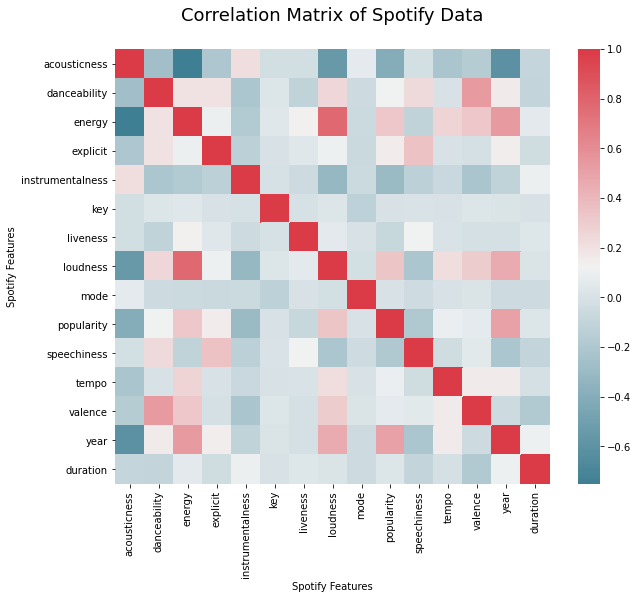

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))

corr = df.corr(method='pearson')

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Correlation Matrix of Spotify Data', fontdict={'fontsize':18}, pad=28)

plt.xlabel("Spotify Features")

plt.ylabel("Spotify Features")

Now, in order to see the exact values, data correlations printed feature by feature. The range of values from [ -1, 1 ].

In [ ]:
correlation_mat = df.corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

acousticness  acousticness        1.000000
              danceability       -0.263217
              energy             -0.750852
              explicit           -0.208176
              instrumentalness    0.221956
                                    ...   
duration      speechiness        -0.097833
              tempo              -0.008179
              valence            -0.183199
              year                0.105661
              duration            1.000000
Length: 225, dtype: float64


In [ ]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

acousticness  energy         -0.750852
energy        acousticness   -0.750852
year          acousticness   -0.607515
acousticness  year           -0.607515
loudness      acousticness   -0.546639
                                ...   
explicit      explicit        1.000000
energy        energy          1.000000
danceability  danceability    1.000000
year          year            1.000000
duration      duration        1.000000
Length: 225, dtype: float64


To see the weak and positive strong correlation, values restricted from -0.5 to 1.0 for weak correlation and for positive strong correlation values are choosen from 0.5 to 1.0. Because of data are row by column they match twice and also each other, that is why value 1.0 correlations and other correlations that fits the condition printed twice. 

In [ ]:
negative_pairs = sorted_pairs[(sorted_pairs) < -0.5]

print(negative_pairs)

acousticness  energy         -0.750852
energy        acousticness   -0.750852
year          acousticness   -0.607515
acousticness  year           -0.607515
loudness      acousticness   -0.546639
acousticness  loudness       -0.546639
dtype: float64


In [ ]:
strong_pair = sorted_pairs[(sorted_pairs) > 0.5]
print(strong_pair)

popularity        year                0.513227
year              popularity          0.513227
danceability      valence             0.536713
valence           danceability        0.536713
year              energy              0.540850
energy            year                0.540850
                  loudness            0.779267
loudness          energy              0.779267
acousticness      acousticness        1.000000
loudness          loudness            1.000000
valence           valence             1.000000
tempo             tempo               1.000000
speechiness       speechiness         1.000000
popularity        popularity          1.000000
mode              mode                1.000000
liveness          liveness            1.000000
key               key                 1.000000
instrumentalness  instrumentalness    1.000000
explicit          explicit            1.000000
energy            energy              1.000000
danceability      danceability        1.000000
year         

As seen above, in negative weak correlation acousticness is the common weak correlation among other features. So, in order to see detailed values of correlation in acousticness feature by feature heatmap used again.

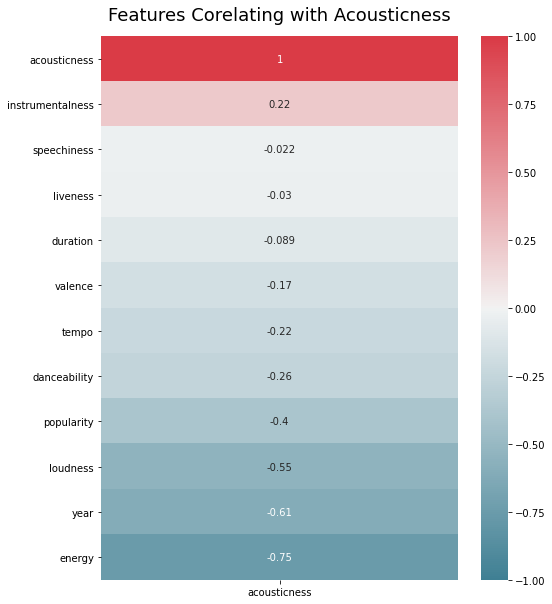

In [ ]:
plt.figure(figsize=(8,10))

heatmap = sns.heatmap(df.drop(['key','mode','explicit'],axis=1).corr()[['acousticness']].sort_values(by='acousticness', ascending=False), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
heatmap.set_title('Features Corelating with Acousticness', fontdict={'fontsize':18}, pad=16);

The strongest relation is between loudness and energy. Thus, other features that correlated with loudness and energy showed. The interesting result is while data closing to the present loudness and energetic songs much more revealed than before.

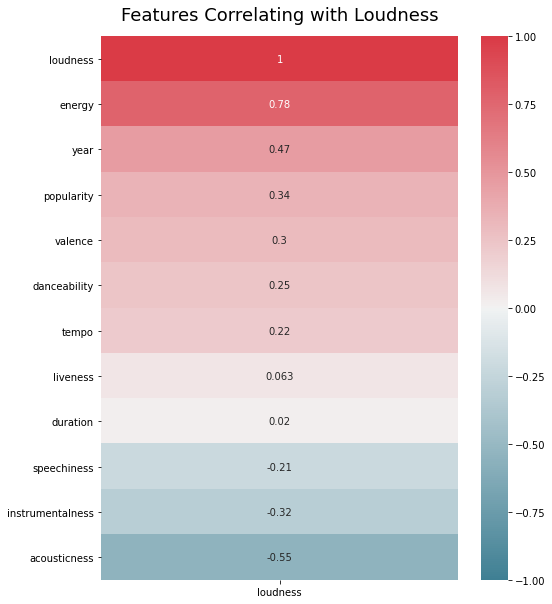

In [ ]:
plt.figure(figsize=(8, 10))
heatmap = sns.heatmap(df.drop(['key','mode','explicit'],axis=1).corr()[['loudness']].sort_values(by='loudness', ascending=False), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
heatmap.set_title('Features Correlating with Loudness', fontdict={'fontsize':18}, pad=16);

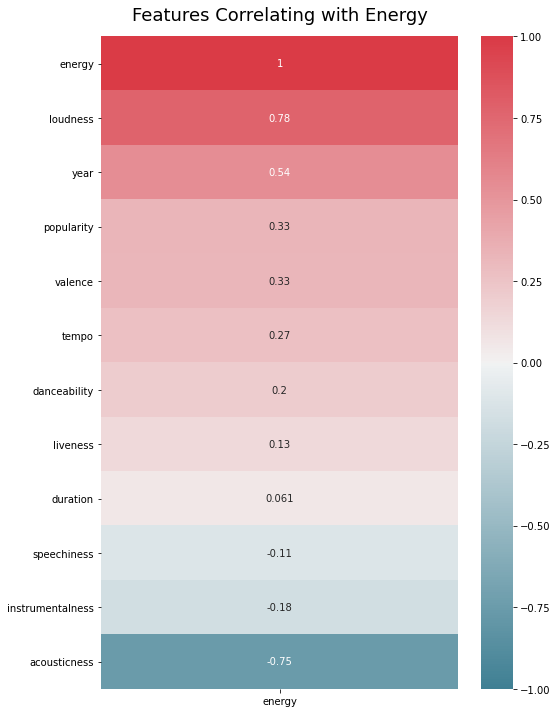

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.drop(['key','mode','explicit'],axis=1).corr()[['energy']].sort_values(by='energy', ascending=False), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
heatmap.set_title('Features Correlating with Energy', fontdict={'fontsize':18}, pad=16);

The categorical feature Popularity can also be checked feature by feature. So, popularity mostly dependent on loudness and energetic songs, and as discussed above it can be concluded that people are tend to listen present songs than past ones.

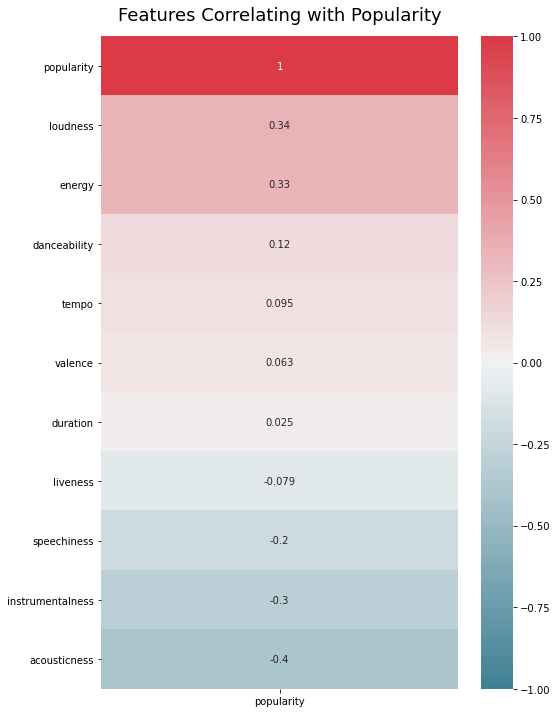

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.drop(['key','mode','explicit','year'],axis=1).corr()[['popularity']].sort_values(by='popularity', ascending=False), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
heatmap.set_title('Features Correlating with Popularity', fontdict={'fontsize':18}, pad=16);

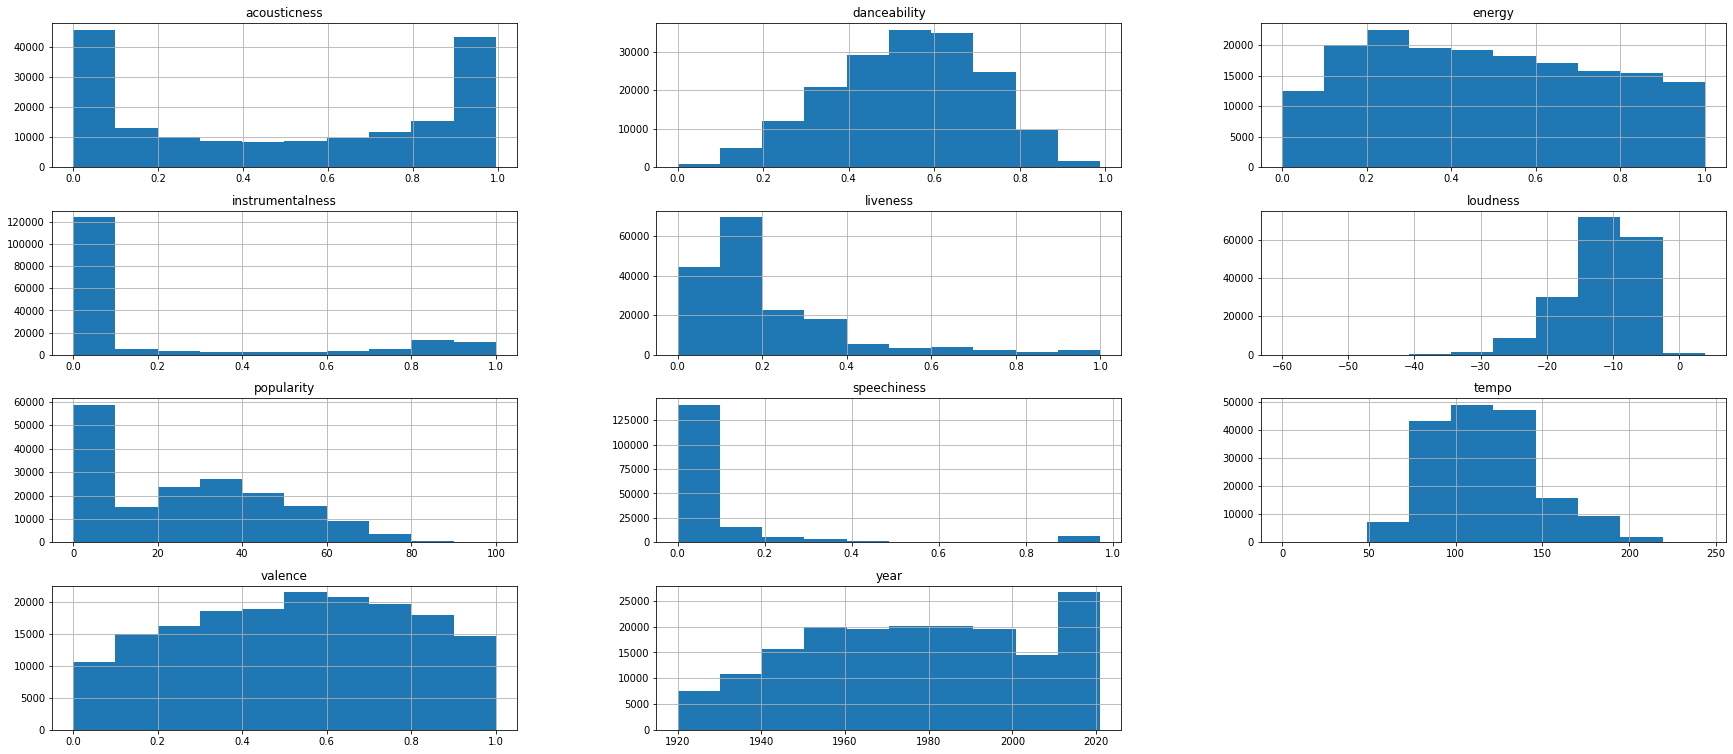

In [ ]:
df.drop(['key','mode','explicit','duration'],axis=1).hist(figsize=(30, 13))
plt.show()

The below graph shows the popularity year by year, the highest popular year is 2001 the lowest is 1992. This graph can be seen as corrabrative to what concluded above which is people are tend to listen present songs than past ones.

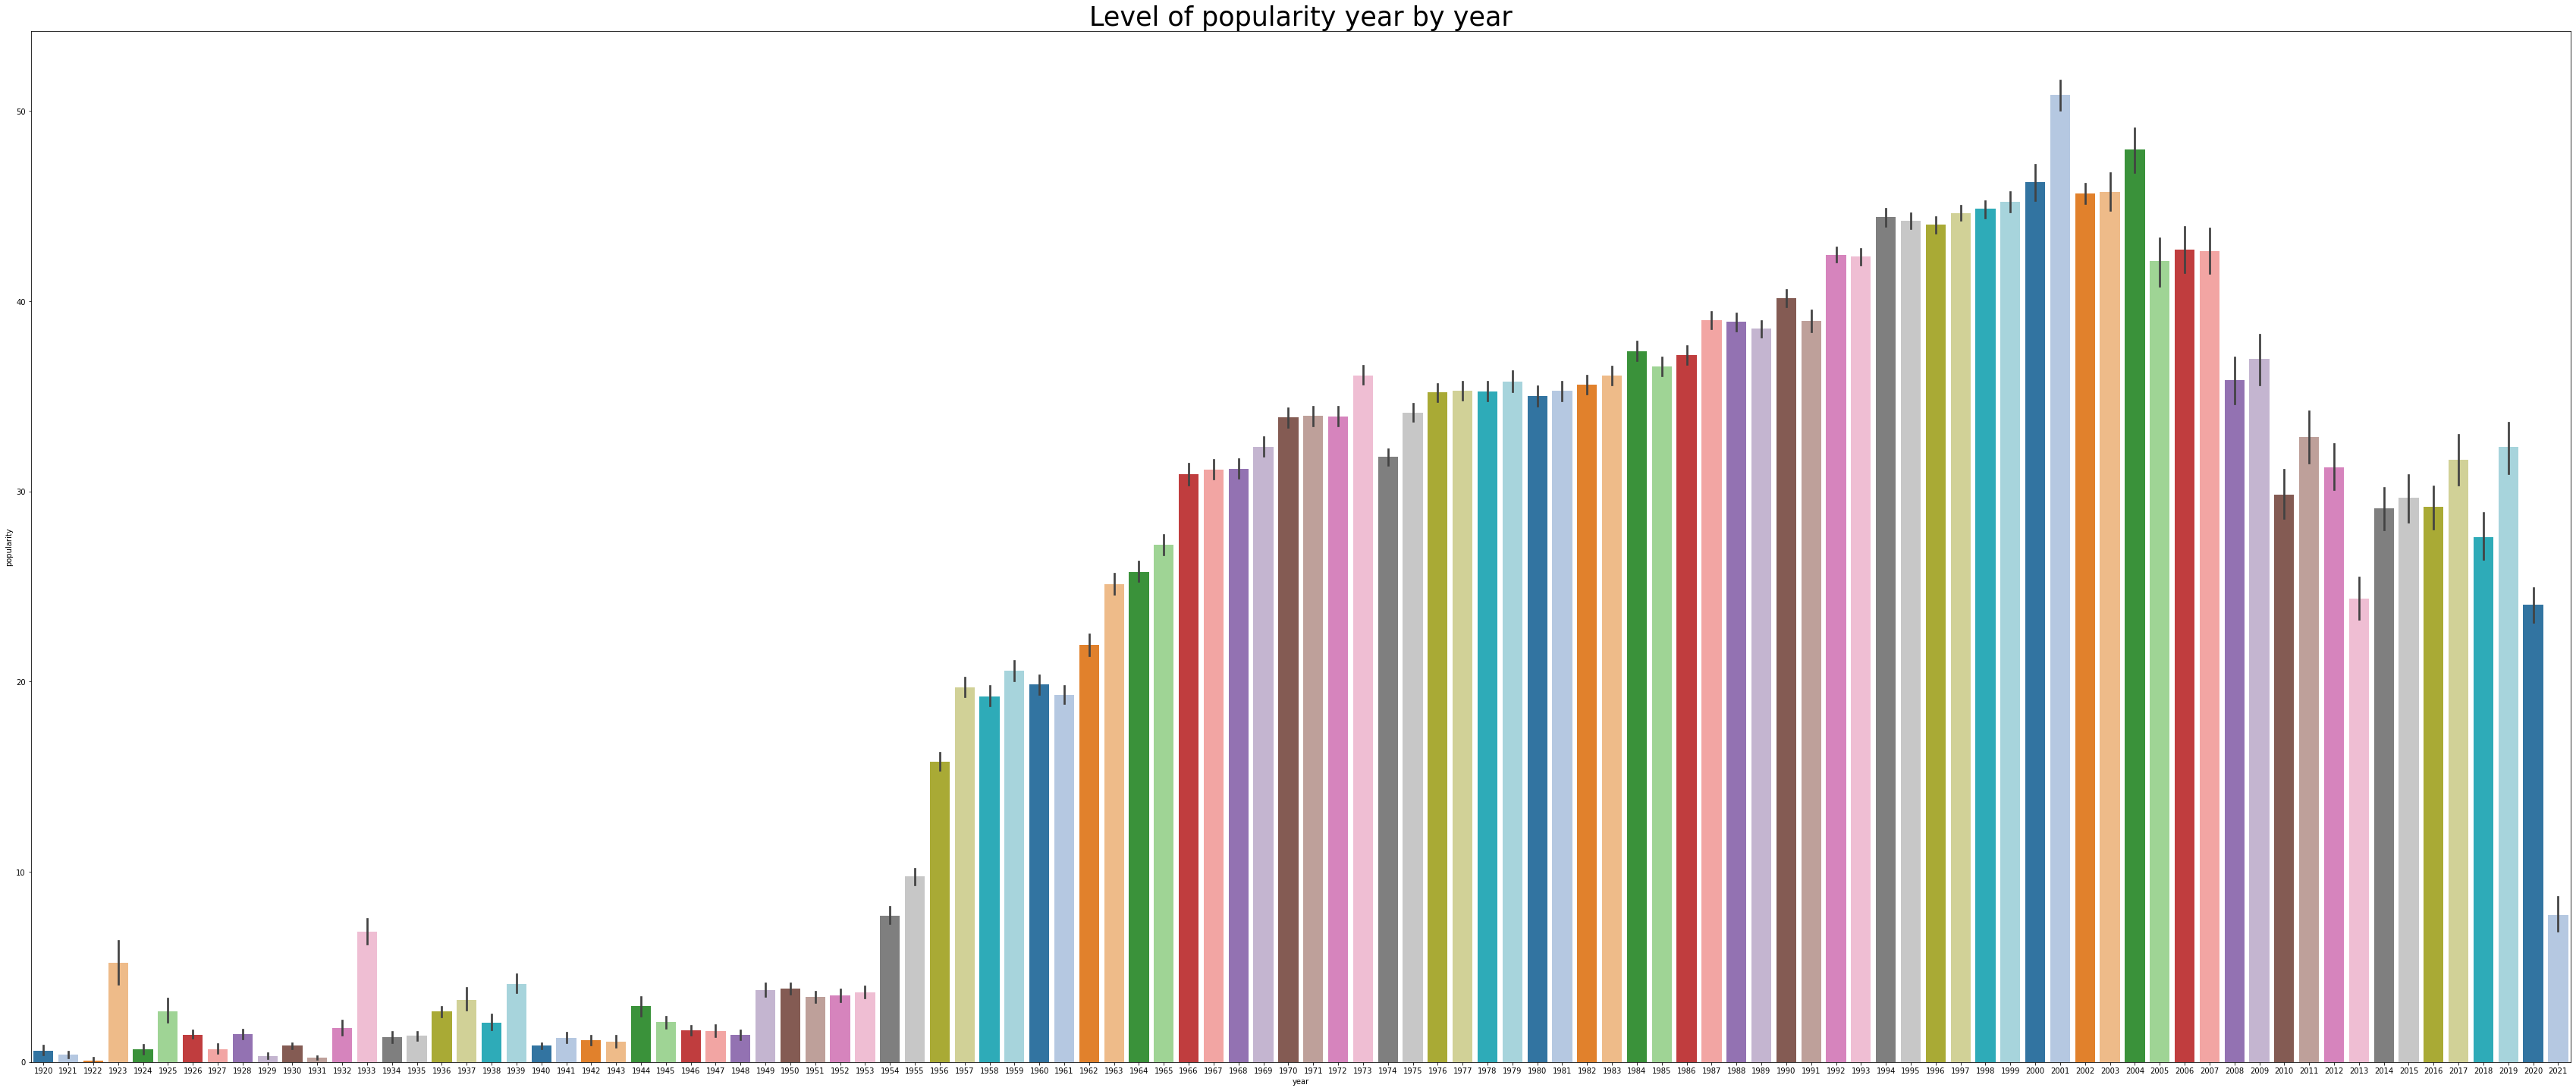

In [ ]:
fig, ax = plt.subplots(figsize=(60,25))
df_year["year"] = df_year["year"].astype(int)
sns.barplot(data=df, x="year",  y="popularity", palette='tab20')
ax.set_title("Level of popularity year by year", size=35);

For continous features pairwise scatter plot used to see the all negative, strong, non correlations. 

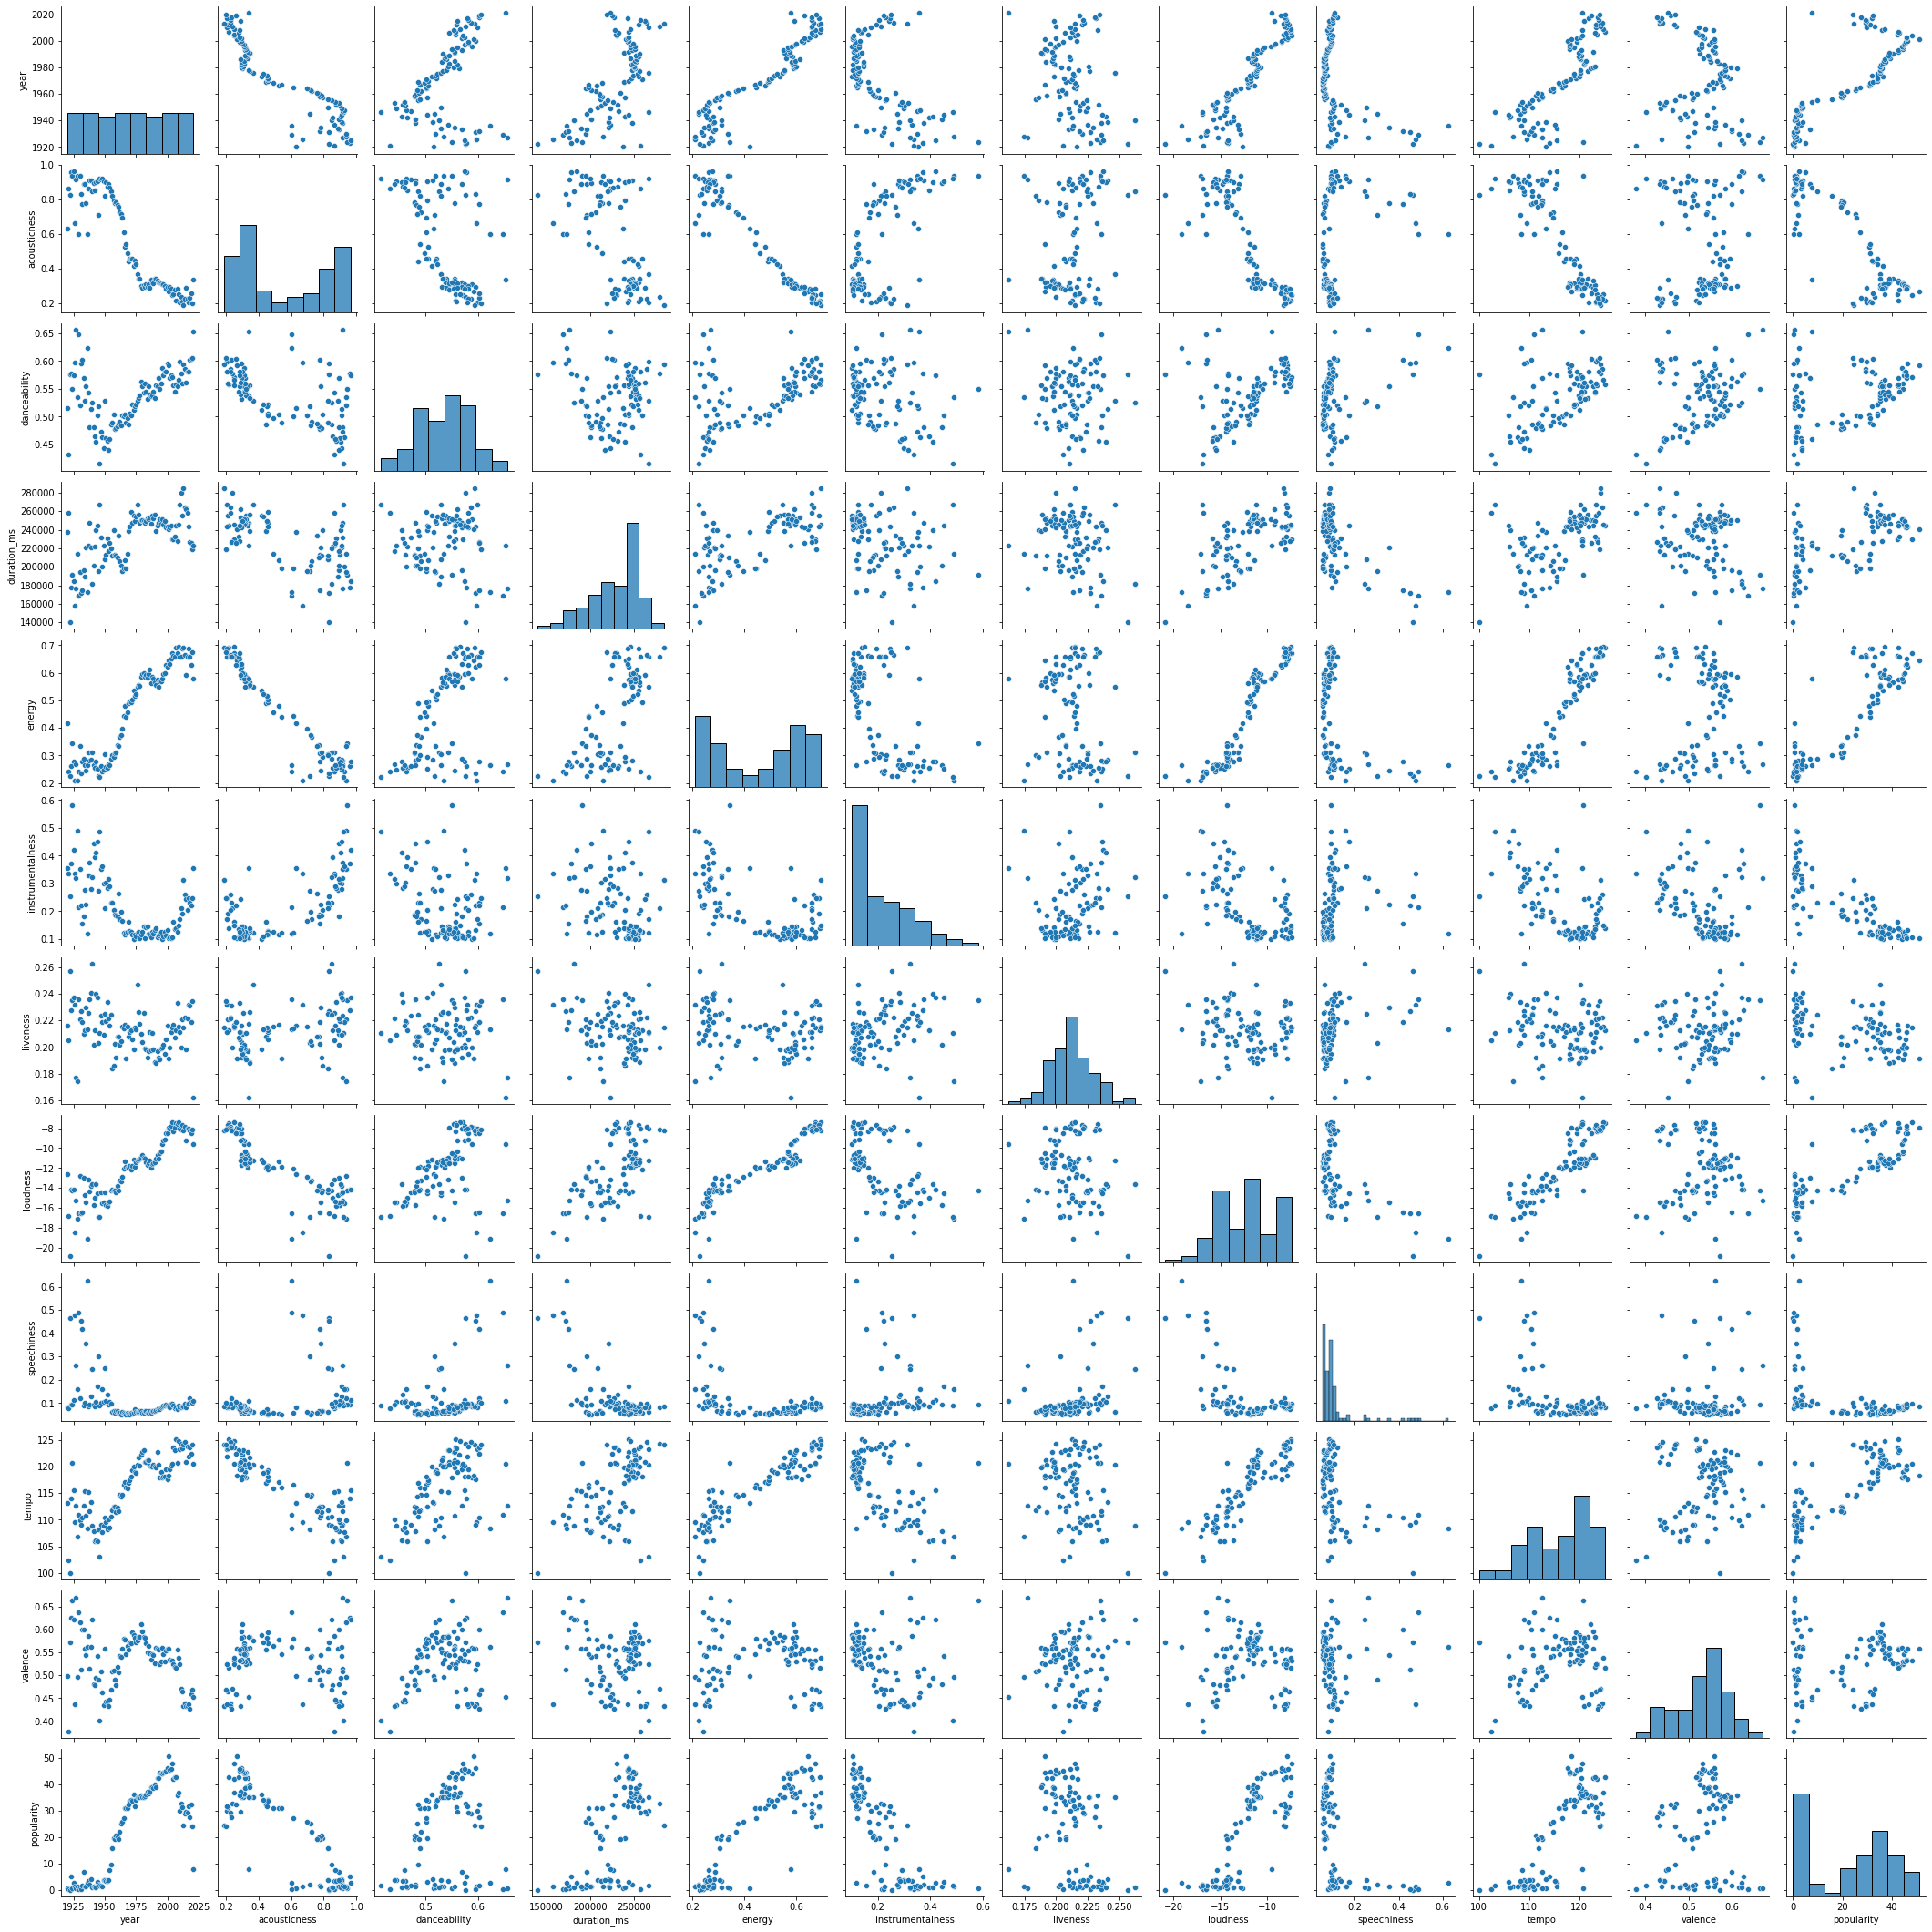

In [ ]:
sns.pairplot(df_year.drop(['key','mode'],axis=1))

###Analysis of the most popular artists and songs

In [ ]:
df_popularity = df.sort_values("popularity", ascending=False)
df_popularity

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration
20062,0.721,['Olivia Rodrigo'],0.585,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,100,2021-01-08,0.0601,143.874,0.132,2021,242
19862,0.221,"['24kGoldn', 'iann dior']",0.700,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,2020-07-24,0.0369,90.989,0.756,2020,141
19866,0.468,['Ariana Grande'],0.737,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,0.682,2020,172
19886,0.401,"['Bad Bunny', 'Jhay Cortez']",0.731,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,2020-10-30,0.0544,109.928,0.145,2020,205
19976,0.212,['KAROL G'],0.863,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,2020-10-23,0.1520,163.908,0.838,2020,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63064,0.982,['Tarun Banerjee'],0.530,0.204,0,0UJPWXDSQDfIBtEpZYWlK4,0.004510,11,0.1430,-15.468,0,Phul Nebe Go,0,1952-12-01,0.1080,79.712,0.320,1952,199
63063,0.994,['Georges Derveaux'],0.209,0.245,0,0UEEHpJgY8di7fbAn7Z8lr,0.916000,2,0.1280,-15.440,1,Habanera,0,1952-01-01,0.0415,139.475,0.148,1952,163
63062,0.154,['Эрнест Хемингуэй'],0.800,0.328,1,0Tyr2WpQlXyPq9VI4Ir7Fw,0.000000,6,0.2670,-17.704,1,Часть 44.3 - Старик и море,0,1952,0.9250,42.490,0.344,1952,96
63061,0.958,"['Hector Berlioz', 'Concertgebouworkest', 'Edu...",0.276,0.172,0,0TqGhvkmiAiYg7YZ3CH6mj,0.633000,9,0.0651,-16.904,1,"Symphonie fantastique, Op. 14, H 48: 2. Un bal...",0,1952-01-01,0.0441,89.437,0.164,1952,371


In [ ]:
df_popularity.set_index("popularity")

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,release_date,speechiness,tempo,valence,year,duration
popularity,,,,,,,,,,,,,,,,,,
100,0.721,['Olivia Rodrigo'],0.585,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,2021-01-08,0.0601,143.874,0.132,2021,242
96,0.221,"['24kGoldn', 'iann dior']",0.700,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),2020-07-24,0.0369,90.989,0.756,2020,141
96,0.468,['Ariana Grande'],0.737,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,2020-10-30,0.0878,144.015,0.682,2020,172
95,0.401,"['Bad Bunny', 'Jhay Cortez']",0.731,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,2020-10-30,0.0544,109.928,0.145,2020,205
95,0.212,['KAROL G'],0.863,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,2020-10-23,0.1520,163.908,0.838,2020,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.982,['Tarun Banerjee'],0.530,0.204,0,0UJPWXDSQDfIBtEpZYWlK4,0.004510,11,0.1430,-15.468,0,Phul Nebe Go,1952-12-01,0.1080,79.712,0.320,1952,199
0,0.994,['Georges Derveaux'],0.209,0.245,0,0UEEHpJgY8di7fbAn7Z8lr,0.916000,2,0.1280,-15.440,1,Habanera,1952-01-01,0.0415,139.475,0.148,1952,163
0,0.154,['Эрнест Хемингуэй'],0.800,0.328,1,0Tyr2WpQlXyPq9VI4Ir7Fw,0.000000,6,0.2670,-17.704,1,Часть 44.3 - Старик и море,1952,0.9250,42.490,0.344,1952,96


I assume that %1 percentage of songs are considered most popular songs and I get these songs to analyze.

In [ ]:
df_new_pop=df_popularity.set_index("popularity").head(1743)

In [ ]:
df_popularity.head(1743).describe()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,duration
count,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.00000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000
mean,0.247735,0.651647,0.626297,0.356282,0.018251,5.239243,0.169702,-6.784828,0.61790,78.994263,0.097986,120.602227,0.492954,2012.579461,210.033850
std,0.262951,0.150708,0.185381,0.479037,0.098876,3.601508,0.126793,3.145444,0.48604,3.882897,0.096516,29.749142,0.229022,12.662599,50.155459
min,0.000010,0.000000,0.000020,0.000000,0.000000,0.000000,0.024400,-40.449000,0.00000,75.000000,0.000000,0.000000,0.000000,1942.000000,65.000000
25%,0.036150,0.551000,0.512000,0.000000,0.000000,2.000000,0.094400,-8.116000,0.00000,76.000000,0.037900,96.985000,0.319500,2013.000000,179.000000
50%,0.150000,0.666000,0.641000,0.000000,0.000000,5.000000,0.119000,-6.175000,1.00000,78.000000,0.056800,120.009000,0.485000,2018.000000,205.000000
75%,0.388000,0.761000,0.764000,1.000000,0.000070,8.000000,0.202500,-4.797500,1.00000,81.000000,0.112000,140.050500,0.670000,2020.000000,234.000000
max,0.994000,0.980000,0.988000,1.000000,1.000000,11.000000,0.832000,-1.190000,1.00000,100.000000,0.777000,220.099000,0.979000,2021.000000,536.000000


In [ ]:
df_new_pop.tail()

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,release_date,speechiness,tempo,valence,year,duration
popularity,,,,,,,,,,,,,,,,,,
75,0.002490,"['Beyoncé', 'JAY-Z']",0.646,0.770,0,5IVuqXILoxVWvWEPm82Jxr,0.000000,2,0.0715,-6.596,0,Crazy In Love (feat. Jay-Z),2003-06-24,0.2260,99.165,0.681,2003,236
75,0.000996,['Disturbed'],0.695,0.876,1,40rvBMQizxkIqnjPdEWY1v,0.000007,3,0.1060,-4.262,0,Down with the Sickness,2000-03-07,0.0553,89.954,0.941,2000,279
75,0.028700,"['Calvin Harris', 'John Newman']",0.414,0.857,0,07nH4ifBxUB4lZcsf44Brn,0.005740,0,0.3430,-4.078,0,Blame (feat. John Newman),2014-10-31,0.0808,128.024,0.348,2014,213
75,0.270000,['Junior H'],0.576,0.604,1,3WQilym5Vi4ypxb70vx0eY,0.000000,5,0.1760,-7.558,0,Mente Positiva,2020-03-27,0.0470,99.746,0.734,2020,192
75,0.028600,['Lil Baby'],0.585,0.641,1,7ge7BHazYbVKi8qyZUX1Bm,0.000000,6,0.3160,-4.269,0,Emotionally Scarred,2020-02-28,0.1330,88.284,0.266,2020,198


The danceability of most popular songs is between 0.6 and 0.8.

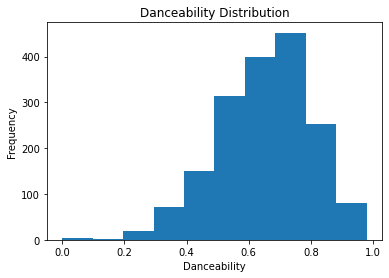

In [ ]:
ax = df_popularity.head(1743)["danceability"].plot.hist()
ax.set_title("Danceability Distribution")
ax.set_xlabel("Danceability")
plt.show()

The energy of most popular songs is between 0.6 and 0.8.

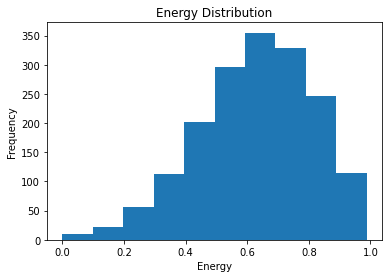

In [ ]:
ax = df_popularity.head(1743)["energy"].plot.hist()
ax.set_title("Energy Distribution")
ax.set_xlabel("Energy")
plt.show()

The loudness of most popular songs is between -10 and -5.

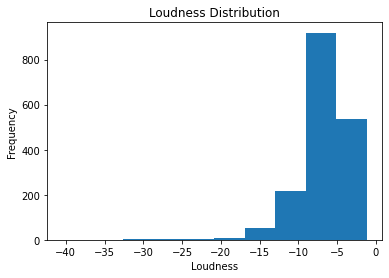

In [ ]:
ax = df_popularity.head(1743)["loudness"].plot.hist()
ax.set_title("Loudness Distribution")
ax.set_xlabel("Loudness")
plt.show()

The liveness of most popular songs is between 0 and 0.2.

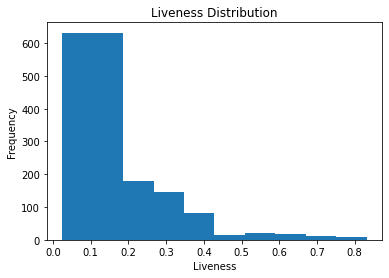

In [ ]:
ax = df_popularity.head(1743)["liveness"].plot.hist()
ax.set_title("Liveness Distribution")
ax.set_xlabel("Liveness")
plt.show()

The acousticness of most popular songs is between 0 and 0.1.

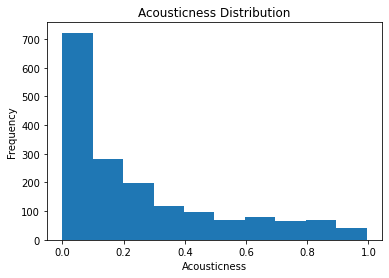

In [ ]:
ax = df_popularity.head(1743)["acousticness"].plot.hist()
ax.set_title("Acousticness Distribution")
ax.set_xlabel("Acousticness")
plt.show()

Most of the popular songs are not explicit.

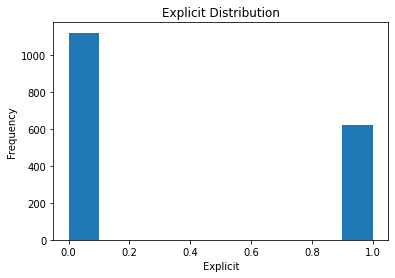

In [ ]:
ax = df_popularity.head(1743)["explicit"].plot.hist()
ax.set_title("Explicit Distribution")
ax.set_xlabel("Explicit")
plt.show()

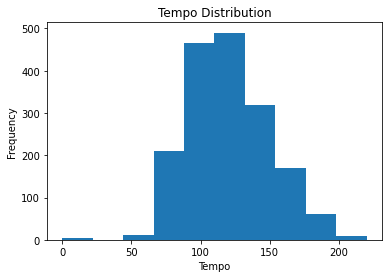

In [ ]:
ax = df_popularity.head(1743)["tempo"].plot.hist()
ax.set_title("Tempo Distribution")
ax.set_xlabel("Tempo")
plt.show()

In [ ]:
years = df.year.unique()
top_artists_each_year = [df.query('year==@year').sort_values("popularity",ascending=False).iloc[0] for year in years]
top_artists_each_year_df = pd.DataFrame(top_artists_each_year)
top_artists_each_year_df['artists'] = top_artists_each_year_df['artists'].apply(lambda x:x.replace("[","").replace("]","").replace("'",""))
fig = px.scatter(top_artists_each_year_df, x="year", y="popularity",hover_data=['artists','name'])
fig.update_traces(mode='markers', marker_line_width=2,marker=dict(size=10,color='rgb(164, 212, 186)'))
fig.update_layout(title="Most Popular Artists and Songs Each Year")
fig.show()


###Analyzing how songs of different genres change with time

For this part we will use other datasets called "data_w_genres" and "data_by_genres".

In [ ]:
df_genres = pd.read_csv(join(path_prefix, "data_w_genres.csv"))
df_by_genres = pd.read_csv(join(path_prefix, "data_by_genres.csv"))
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32539 entries, 0 to 32538
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           32539 non-null  object 
 1   acousticness      32539 non-null  float64
 2   danceability      32539 non-null  float64
 3   duration_ms       32539 non-null  float64
 4   energy            32539 non-null  float64
 5   instrumentalness  32539 non-null  float64
 6   liveness          32539 non-null  float64
 7   loudness          32539 non-null  float64
 8   speechiness       32539 non-null  float64
 9   tempo             32539 non-null  float64
 10  valence           32539 non-null  float64
 11  popularity        32539 non-null  float64
 12  key               32539 non-null  int64  
 13  mode              32539 non-null  int64  
 14  count             32539 non-null  int64  
 15  genres            32539 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

As it can be seen from the above, this dataset has not the "year" metric. Thus, we need to merge "data_w_genres" with "data" in order to get the year informations while looking at the genres.

In [ ]:
df_genres.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


When we look at the general structure of the data, it can be seen that some rows have "genres" as "[]" which suggests that data doesn't have specific genres. Hence, we will consider "[]" as a missing value for our analysis.

In [ ]:
df_genres.replace("[]", np.nan, inplace=True)
df_genres.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,NaN
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,NaN
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,NaN
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,NaN


In [ ]:
df_altered = df_genres.copy()
df_altered.dropna(inplace=True)
df_altered.head()  #so we get rid of missing values

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
8,"""Weird Al"" Yankovic",0.186821,0.650792,218352.962264,0.693189,0.000045,0.160926,-9.691151,0.082275,132.876604,0.764585,32.867925,9,1,106,"['comedy rock', 'comic', 'parody']"
10,$NOT,0.458167,0.826667,146886.333333,0.518667,0.000007,0.201683,-8.713167,0.272550,90.728833,0.426750,74.166667,0,1,6,"['florida rap', 'underground hip hop', 'vapor ..."
11,$atori Zoom,0.239000,0.883000,141519.000000,0.625000,0.000000,0.076500,-4.098000,0.245000,126.677000,0.871000,69.000000,6,1,2,"['dark trap', 'meme rap']"
13,$uicideBoy$,0.154637,0.778551,149915.289855,0.625870,0.024720,0.209223,-6.553899,0.149986,117.679087,0.242772,65.333333,1,1,69,"['dark trap', 'new orleans rap', 'underground ..."


In [ ]:
print(df_altered.loc[10]["genres"])
print(df_altered.loc[0]["genres"])

['florida rap', 'underground hip hop', 'vapor trap']
['show tunes']


It is clear that some artists can have songs from various genres. In order to make a proper analysis, we would take into account artists whose songs belong to a unique genre.

In [ ]:
def arrange_genres(genres):             #we arranged the string as "data_by_genres" and "data_w_genres" don't fit each other in terms of genres
  new_genre = genres[2:len(genres)-2]   
  return new_genre

df_altered["new_genres"] = df_altered["genres"].apply(arrange_genres)

genres_list = list(df_by_genres["genres"])

def unique_genre(row):                 #check whether the artist's genres is unique or not
  artist_genre = row["new_genres"]
  if artist_genre in genres_list:
    return True

df_altered["have_unique"] = df_altered.apply(unique_genre, axis=1)

df_altered.dropna(inplace=True)       #drop artists who has more than one genres

df_altered.drop(["genres","have_unique"], axis=1, inplace=True)
df_altered.head()                     #design the structure of the dataset accourding to new arrangements

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,new_genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.4701,267072.0,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,show tunes
23,*spandrel,0.897000,0.5130,236644.0,0.642000,0.034800,0.208000,-14.456000,0.367000,107.057000,0.302000,0.000000,8,0,4,indy indie
50,19 Hz,0.005120,0.8030,434027.0,0.529000,0.715000,0.446000,-10.279000,0.066900,129.990000,0.800000,0.000000,6,0,2,progressive trance house
54,1927,0.002240,0.5650,253227.0,0.777000,0.055500,0.213000,-3.233000,0.033500,123.102000,0.395000,51.000000,7,1,2,la indie
55,1986 Omega Tribe,0.319856,0.6800,274628.0,0.612111,0.028257,0.169333,-13.467889,0.031933,121.795222,0.834889,37.888889,9,0,18,classic city pop


In [ ]:
df_altered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5678 entries, 0 to 32538
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           5678 non-null   object 
 1   acousticness      5678 non-null   float64
 2   danceability      5678 non-null   float64
 3   duration_ms       5678 non-null   float64
 4   energy            5678 non-null   float64
 5   instrumentalness  5678 non-null   float64
 6   liveness          5678 non-null   float64
 7   loudness          5678 non-null   float64
 8   speechiness       5678 non-null   float64
 9   tempo             5678 non-null   float64
 10  valence           5678 non-null   float64
 11  popularity        5678 non-null   float64
 12  key               5678 non-null   int64  
 13  mode              5678 non-null   int64  
 14  count             5678 non-null   int64  
 15  new_genres        5678 non-null   object 
dtypes: float64(11), int64(3), object(2)
memor

We accomplished to arrange the dataset "data_w_genres" according to our needs.

Now, we have the information about the artists and the unique genres they belong to. However, yet we could not get the "year" information of these genres. 

In [ ]:
def arrange_artists(artist):            #in order to merge "data" and "data_w_genres" we rearrange the artists names in "data"
  new_artist = artist[2:len(artist)-2]
  return new_artist
#data['artists'] = data['artists'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))
df["artists"] = df["artists"].apply(arrange_artists)

#df["artists"] = df["artists"].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))
#df = df.explode('artists')
df.head()

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration
0,0.991000,Mamie Smith,0.598,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,168
1,0.643000,Screamin' Jay Hawkins,0.852,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,150
2,0.993000,Mamie Smith,0.647,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,164
3,0.000173,Oscar Velazquez,0.730,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,422
4,0.295000,Mixe,0.704,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,165


In [ ]:
df_merged = pd.merge(df, df_altered[['artists','new_genres']], on='artists', how='inner')
df_merged.drop(['explicit', 'mode', 'key','release_date','id'], axis=1,inplace=True)
df_merged.head()

,acousticness,artists,danceability,energy,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,valence,year,duration,new_genres
0,0.000173,Oscar Velazquez,0.730,0.798,0.801000,0.1280,-7.311,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422,1920,422,circuit
1,0.000012,Oscar Velazquez,0.568,0.729,0.912000,0.0613,-8.293,True House Music - Original Massive Mix,3,0.0312,129.987,0.1750,1920,386,circuit
2,0.001150,Oscar Velazquez,0.662,0.936,0.857000,0.0696,-7.633,True House Music - Luis Ache Sunset Remix,13,0.0715,127.995,0.1440,1920,414,circuit
3,0.295000,Mixe,0.704,0.707,0.000246,0.4020,-6.036,Xuniverxe,2,0.0768,122.076,0.2990,1920,165,glitchcore
4,0.004780,Justrock,0.643,0.998,0.476000,0.1050,-6.120,Schumacher,0,0.0566,124.018,0.6390,1920,304,electro trash


After merging two datasets, we get the "year" and "genres" information together and group the dataset according to them.

In [ ]:
df_grouped = df_merged.groupby(by=["new_genres","year"]).mean()
df_grouped.head(15)

acousticness  danceability  ...   valence     duration
new_genres year                              ...                       
432hz      2000      0.932333      0.065000  ...  0.036167  1873.000000
a cappella 1986      0.788500      0.567500  ...  0.455000   214.000000
           1988      0.801000      0.780500  ...  0.671000   229.000000
           1990      0.949000      0.125000  ...  0.054300   257.000000
           1996      0.884000      0.644000  ...  0.779000   292.000000
           2012      0.523000      0.478000  ...  0.415125   213.000000
           2013      0.004030      0.717000  ...  0.720000   249.000000
           2015      0.293571      0.550571  ...  0.538714   178.000000
           2017      0.367500      0.607750  ...  0.592250   210.750000
           2020      0.043200      0.216000  ...  0.168000   265.000000
           2021      0.525000      0.675000  ...  0.413000   191.000000
accordeon  1964      0.879000      0.503000  ...  0.380000   164.000000
accordion  1954      0.316500      0.664500  ...  0.552500   142.500000
acid jazz  1994      0.211000      0.780000  ...  0.967000   264.000000
           2006      0.518000      0.580556  ...  0.531189   312.777778

[15 rows x 11 columns]

In the analysis part of the genres, we will look at the genres "rap", "pop r&b", "bedroom pop" and "electro house".

####Pop r&b

In [ ]:
df_grouped.loc["pop r&b"]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,duration
year,,,,,,,,,,,
2015,0.4570,0.6170,0.4560,0.000000,0.0913,-5.201,67.0,0.04660,120.080,0.1330,217.0
2018,0.7230,0.3570,0.5330,0.000000,0.1010,-8.126,61.0,0.07770,138.086,0.3180,223.0
2019,0.6095,0.6825,0.3120,0.000428,0.0954,-13.032,76.5,0.06810,103.037,0.6595,191.0
2020,0.1631,0.7610,0.4165,0.000147,0.3045,-8.466,77.0,0.12725,122.562,0.4275,195.0


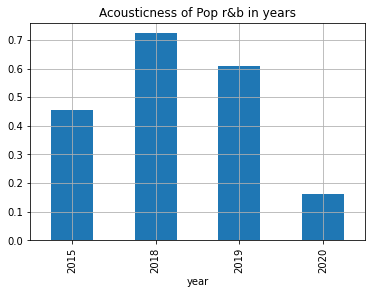

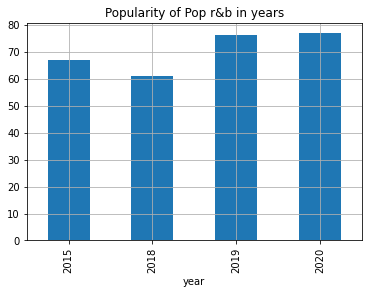

In [ ]:
ax = df_grouped.loc["pop r&b"]["acousticness"].plot.bar(
    title=f"Acousticness of Pop r&b in years",
    grid=True,
)
ax.set_xlabel("year")
plt.show()

ax = df_grouped.loc["pop r&b"]["popularity"].plot.bar(
    title=f"Popularity of Pop r&b in years",
    grid=True,
)
ax.set_xlabel("year")
plt.show()

Although there is a rise from 2015 to 2018 in the acousticness of Pop r&b, after 2018 it decreases significantly.

From the perspective of popularity, we can see that there is not such a big change. It seems that Pop r&b is popular in general but rises thorugh 2020.

####Bedroom Pop

In [ ]:
df_grouped.loc["bedroom pop"]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,duration
year,,,,,,,,,,,
2016,0.385000,0.576500,0.569500,0.006355,0.257500,-8.1160,62.000000,0.037100,119.968000,0.273500,299.000000
2017,0.657333,0.788333,0.540667,0.000472,0.085333,-7.0260,72.333333,0.066133,100.694000,0.462333,140.666667
2018,0.407500,0.699500,0.506500,0.004230,0.118300,-6.0800,68.000000,0.029900,89.694000,0.549000,143.500000
2019,0.409523,0.714167,0.433450,0.114203,0.220833,-13.5625,72.833333,0.052850,125.935833,0.604333,192.000000
2020,0.056300,0.399000,0.491000,0.000890,0.110000,-10.7780,89.000000,0.053800,91.066000,0.151000,210.000000


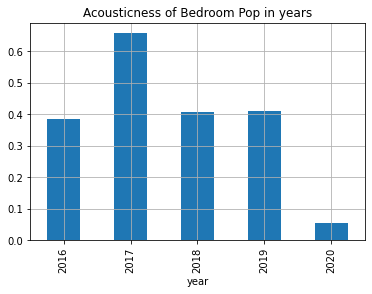

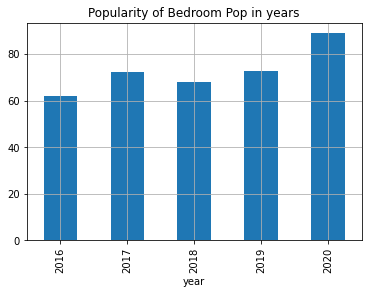

In [ ]:
ax = df_grouped.loc["bedroom pop"]["acousticness"].plot.bar(
    title=f"Acousticness of Bedroom Pop in years",
    grid=True,
)
ax.set_xlabel("year")
plt.show()

ax = df_grouped.loc["bedroom pop"]["popularity"].plot.bar(
    title=f"Popularity of Bedroom Pop in years",
    grid=True,
)
ax.set_xlabel("year")
plt.show()

Bedroom Pop's acousticness vary, suddenly it rises a lot but then there is a great decrese from 2017 to 2018 and from 2019 to 2020.

There is an significant increase in the popularity of Bedroom Pop towards 2020. It increases from 62 to 89.

####Electro House

In [ ]:
df_grouped.loc["electro house"]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,duration
year,,,,,,,,,,,
2014,0.011200,0.7910,0.6520,0.109000,0.0804,-4.092,65.0,0.04260,179.9980,0.494,264.0
2015,0.014988,0.6965,0.7045,0.165502,0.1180,-4.958,70.5,0.03945,108.9785,0.295,222.0
2017,0.021400,0.6540,0.7110,0.001910,0.0903,-7.437,73.0,0.03830,127.9570,0.198,194.0
2018,0.028100,0.4680,0.6270,0.000008,0.1100,-5.085,79.0,0.04760,179.6420,0.159,212.0


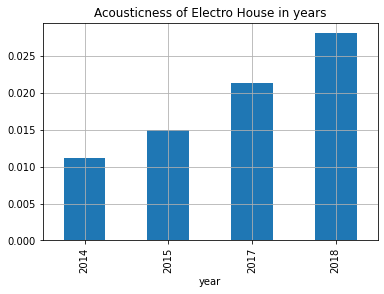

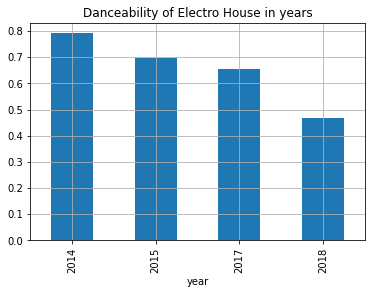

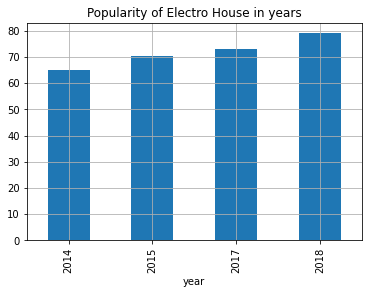

In [ ]:
ax = df_grouped.loc["electro house"]["acousticness"].plot.bar(
    title=f"Acousticness of Electro House in years",
    grid=True,
)
ax.set_xlabel("year")
plt.show()

ax = df_grouped.loc["electro house"]["danceability"].plot.bar(
    title=f"Danceability of Electro House in years",
    grid=True,
)
ax.set_xlabel("year")
plt.show()

ax = df_grouped.loc["electro house"]["popularity"].plot.bar(
    title=f"Popularity of Electro House in years",
    grid=True,
)
ax.set_xlabel("year")
plt.show()

It seems the acousticness of Electro House is slightly increased from 2014 to 2018.

We can say that Electro House's danceability is consistent with acousticness as it decreases over the years.

Through 2018, it's popularity is rised from 65 to 79. 

####Rap

In [ ]:
df_grouped.loc["rap"]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,duration
year,,,,,,,,,,,
1999,0.079000,0.497000,0.537000,0.000139,0.078200,-9.264000,63.000000,0.026900,108.448000,0.371000,265.000000
2001,0.000363,0.392500,0.877000,0.000012,0.268600,-5.254000,64.500000,0.039050,127.048500,0.396000,234.000000
2015,0.170223,0.607667,0.546333,0.000058,0.479667,-6.488000,66.000000,0.106667,135.949667,0.250333,246.000000
2016,0.199764,0.678000,0.608857,0.004334,0.200250,-4.398714,66.142857,0.095250,125.606214,0.342014,227.571429
2018,0.107217,0.698667,0.646267,0.000458,0.199207,-5.276867,73.733333,0.083780,138.970400,0.315327,199.933333
2019,0.054600,0.598000,0.427000,0.000006,0.210000,-8.764000,87.000000,0.031700,76.469000,0.060500,176.000000


There is a gap between 2001 to 2015. Thus it is reasonable that we discard the years before 2015.

In [ ]:
df_grouped.loc["rap"].loc[2015:2019]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,duration
year,,,,,,,,,,,
2015,0.170223,0.607667,0.546333,0.000058,0.479667,-6.488000,66.000000,0.106667,135.949667,0.250333,246.000000
2016,0.199764,0.678000,0.608857,0.004334,0.200250,-4.398714,66.142857,0.095250,125.606214,0.342014,227.571429
2018,0.107217,0.698667,0.646267,0.000458,0.199207,-5.276867,73.733333,0.083780,138.970400,0.315327,199.933333
2019,0.054600,0.598000,0.427000,0.000006,0.210000,-8.764000,87.000000,0.031700,76.469000,0.060500,176.000000


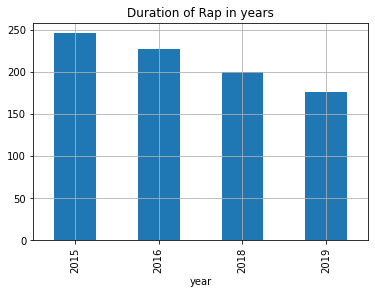

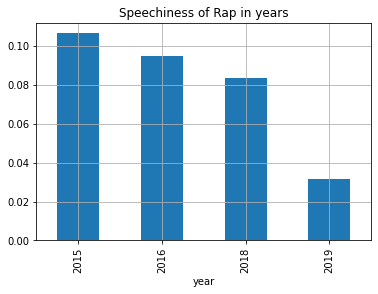

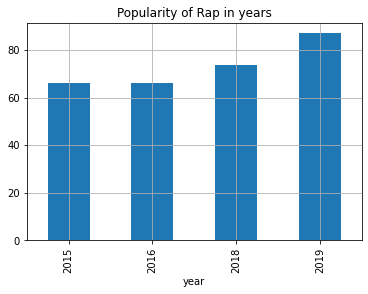

In [ ]:
ax = df_grouped.loc["rap"].loc[2015:2019]["duration"].plot.bar(
    title=f"Duration of Rap in years",
    grid=True,
)
ax.set_xlabel("year")
plt.show()

ax = df_grouped.loc["rap"].loc[2015:2019]["speechiness"].plot.bar(
    title=f"Speechiness of Rap in years",
    grid=True,
)
ax.set_xlabel("year")
plt.show()

ax = df_grouped.loc["rap"].loc[2015:2019]["popularity"].plot.bar(
    title=f"Popularity of Rap in years",
    grid=True,
)
ax.set_xlabel("year")
plt.show()

Duration of Rap and the years are negatively correlated which means when the years increase, the duration decreases.

We might relate speechiness of Rap to the duration as like in duration case, speechiness of Rap also decreases over time.

Like in the other genres, popularity of Rap rises from 2015 to 2019.

##Hypothesis Testing


###Popularity of songs and features

- **Null Hypothesis ($\large{H_0}$)**: Features of the songs and their popularities are not correlated.
- **Alternative Hypothesis ($\large{H_A}$)**: Features of the songs affect their popularities.

We set our significance level as 0.05 for our test just like the most of the hypothesis tests.


In [ ]:
df.drop(['key','mode','year','explicit','id','artists','name'],axis=1).describe().transpose().sort_index()

,count,mean,std,min,25%,50%,75%,max
acousticness,174389.0,0.499228,0.379936,0.0,0.0877,0.517000,0.8950,0.996
danceability,174389.0,0.536758,0.176025,0.0,0.4140,0.548000,0.6690,0.988
duration,174389.0,232.808325,148.395277,5.0,166.0000,206.000000,266.0000,5338.000
energy,174389.0,0.482721,0.272685,0.0,0.2490,0.465000,0.7110,1.000
instrumentalness,174389.0,0.197252,0.334574,0.0,0.0000,0.000524,0.2520,1.000
liveness,174389.0,0.211123,0.180493,0.0,0.0992,0.138000,0.2700,1.000
loudness,174389.0,-11.750865,5.691591,-60.0,-14.9080,-10.836000,-7.4990,3.855
popularity,174389.0,25.693381,21.872740,0.0,1.0000,25.000000,42.0000,100.000
speechiness,174389.0,0.105729,0.182260,0.0,0.0352,0.045500,0.0763,0.971
tempo,174389.0,117.006500,30.254178,0.0,93.9310,115.816000,135.0110,243.507


In [ ]:
#to get more proper result in KDE graph
df["acousticness"] = 100 * df["acousticness"]   
df["danceability"] = 100 * df["danceability"]
df["energy"] = 100 * df["energy"]
df["instrumentalness"] = 100 * df["instrumentalness"]
df["liveness"] = 100 * df["liveness"]
df["speechiness"] = 100 * df["speechiness"]
df["valence"] = 100 * df["valence"]

Mean and standard deviations of the features are given in the table above. 

Now, lets use T-test to test our hypothesis. 

We are goint to consecutively look at acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo and valence. In order to see the data more clear in Comparison with KDE part, we multiply the values of features with 100. And to protect statistical value of the data we use untouched dataframe which is df_popularity.

####Acousticness

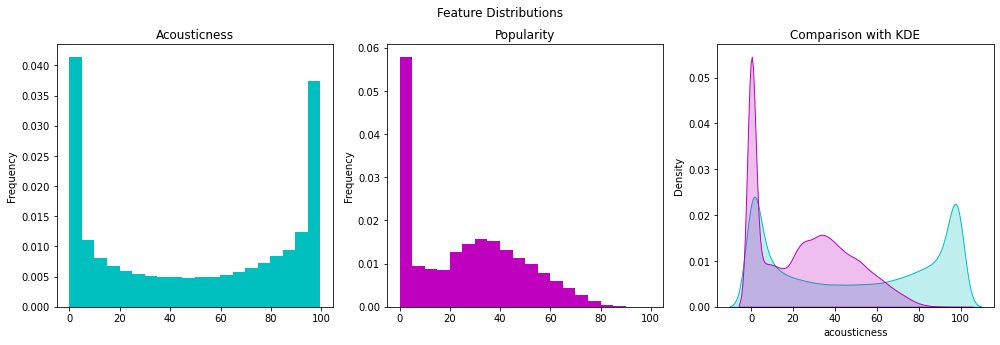

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
df['acousticness'].plot(kind="hist", ax=ax[0], bins=20, label="acousticness", color="c", density=True)
ax[0].set_title("Acousticness")

df['popularity'].plot(kind="hist", ax=ax[1], bins=20, label="popularity", color="m", density=True)
ax[1].set_title("Popularity")

sns.kdeplot(df['acousticness'], shade=True, label="Acousticness", ax=ax[2], color="c")
sns.kdeplot(df['popularity'], shade=True, label="Popularity", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Feature Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
stats.ttest_ind(df_popularity['acousticness'], df_popularity['popularity'], equal_var=False)

Ttest_indResult(statistic=-480.93966823848166, pvalue=0.0)

####Danceability

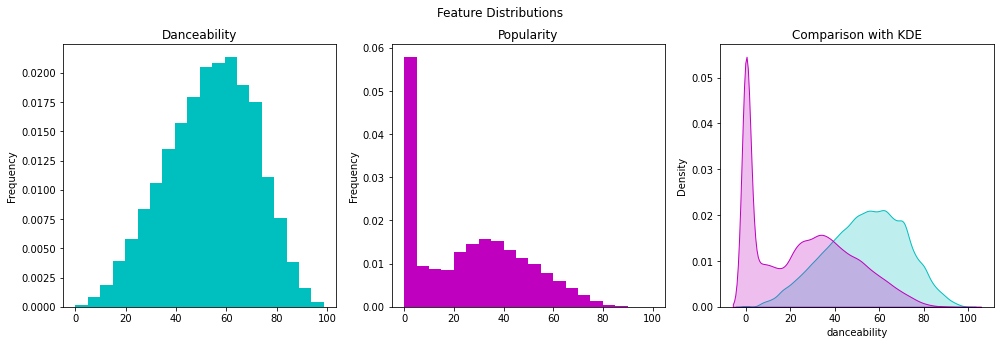

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
df['danceability'].plot(kind="hist", ax=ax[0], bins=20, label="danceability", color="c", density=True)
ax[0].set_title("Danceability")

df['popularity'].plot(kind="hist", ax=ax[1], bins=20, label="popularity", color="m", density=True)
ax[1].set_title("Popularity")

sns.kdeplot(df['danceability'], shade=True, label="Danceability", ax=ax[2], color="c")
sns.kdeplot(df['popularity'], shade=True, label="Popularity", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Feature Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
stats.ttest_ind(df_popularity['danceability'], df_popularity['popularity'], equal_var=False)

Ttest_indResult(statistic=-480.2801526505773, pvalue=0.0)

####Energy

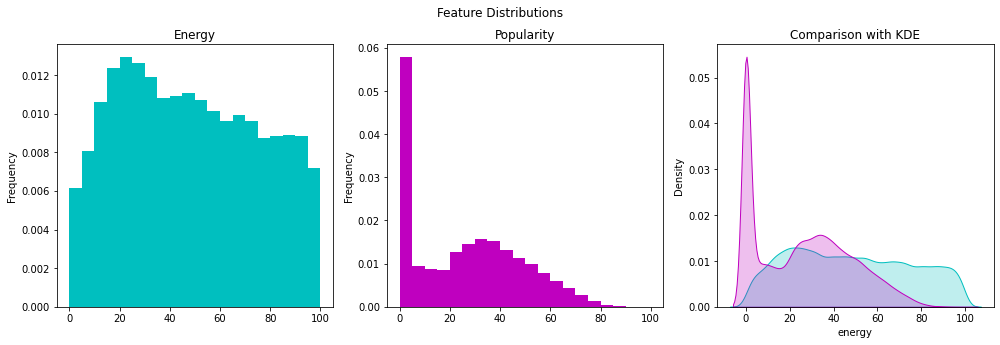

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
df['energy'].plot(kind="hist", ax=ax[0], bins=20, label="energy", color="c", density=True)
ax[0].set_title("Energy")

df['popularity'].plot(kind="hist", ax=ax[1], bins=20, label="popularity", color="m", density=True)
ax[1].set_title("Popularity")

sns.kdeplot(df['energy'], shade=True, label="Energy", ax=ax[2], color="c")
sns.kdeplot(df['popularity'], shade=True, label="Popularity", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Feature Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
stats.ttest_ind(df_popularity['energy'], df_popularity['popularity'], equal_var=False)

Ttest_indResult(statistic=-481.28998589908656, pvalue=0.0)

####Instrumentalness

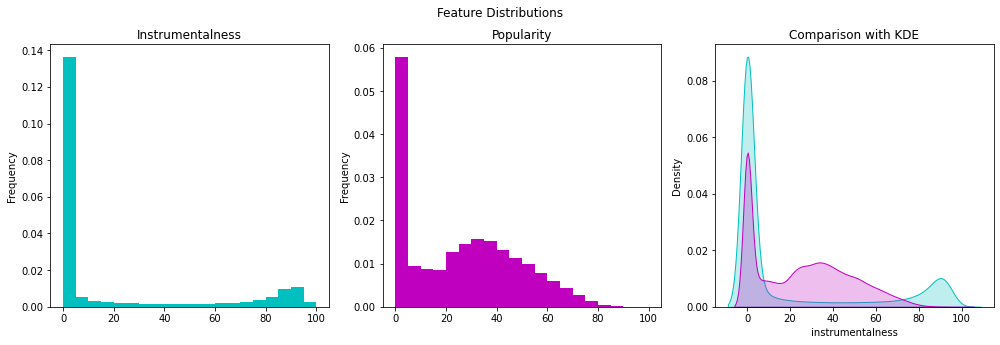

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
df['instrumentalness'].plot(kind="hist", ax=ax[0], bins=20, label="instrumentalness", color="c", density=True)
ax[0].set_title("Instrumentalness")

df['popularity'].plot(kind="hist", ax=ax[1], bins=20, label="popularity", color="m", density=True)
ax[1].set_title("Popularity")

sns.kdeplot(df['instrumentalness'], shade=True, label="Instrumentalness", ax=ax[2], color="c")
sns.kdeplot(df['popularity'], shade=True, label="Popularity", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Feature Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
stats.ttest_ind(df_popularity['instrumentalness'], df_popularity['popularity'], equal_var=False)

Ttest_indResult(statistic=-486.72068063140614, pvalue=0.0)

####Liveness

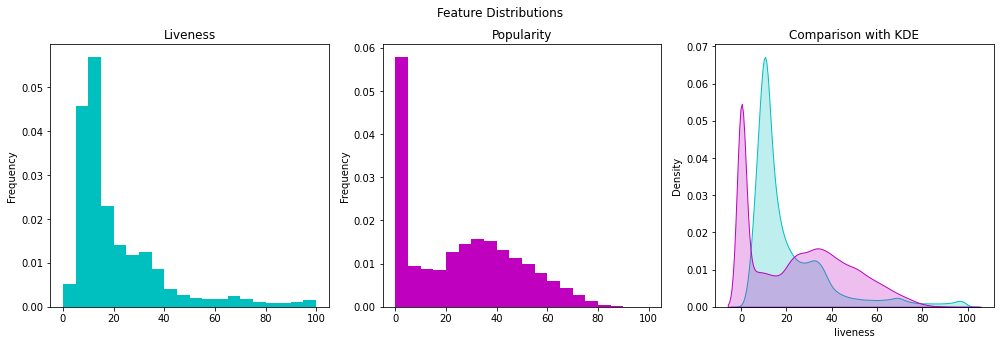

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
df['liveness'].plot(kind="hist", ax=ax[0], bins=20, label="liveness", color="c", density=True)
ax[0].set_title("Liveness")

df['popularity'].plot(kind="hist", ax=ax[1], bins=20, label="popularity", color="m", density=True)
ax[1].set_title("Popularity")

sns.kdeplot(df['liveness'], shade=True, label="Liveness", ax=ax[2], color="c")
sns.kdeplot(df['popularity'], shade=True, label="Popularity", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Feature Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
stats.ttest_ind(df_popularity['liveness'], df_popularity['popularity'], equal_var=False)

Ttest_indResult(statistic=-486.49622494004024, pvalue=0.0)

####Loudness

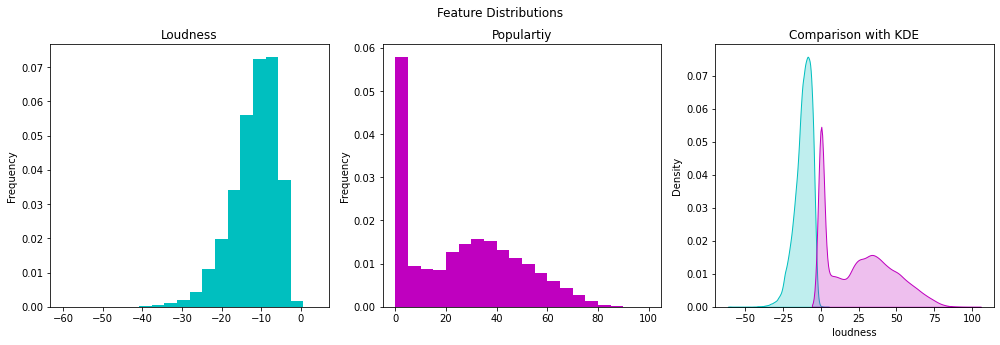

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
df['loudness'].plot(kind="hist", ax=ax[0], bins=20, label="loudness", color="c", density=True)
ax[0].set_title("Loudness")

df['popularity'].plot(kind="hist", ax=ax[1], bins=20, label="popularity", color="m", density=True)
ax[1].set_title("Populartiy")

sns.kdeplot(df['loudness'], shade=True, label="Loudness", ax=ax[2], color="c")
sns.kdeplot(df['popularity'], shade=True, label="Populartiy", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Feature Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
stats.ttest_ind(df_popularity['loudness'], df_popularity['popularity'], equal_var=False)

Ttest_indResult(statistic=-691.8541196962157, pvalue=0.0)

####Speechiness

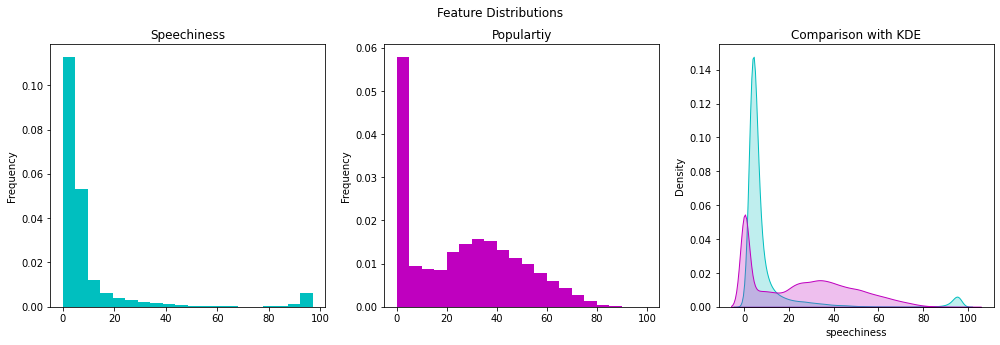

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
df['speechiness'].plot(kind="hist", ax=ax[0], bins=20, label="speechiness", color="c", density=True)
ax[0].set_title("Speechiness")

df['popularity'].plot(kind="hist", ax=ax[1], bins=20, label="popularity", color="m", density=True)
ax[1].set_title("Populartiy")

sns.kdeplot(df['speechiness'], shade=True, label="Speechiness", ax=ax[2], color="c")
sns.kdeplot(df['popularity'], shade=True, label="Popularity", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Feature Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
stats.ttest_ind(df_popularity['loudness'], df_popularity['popularity'], equal_var=False)

Ttest_indResult(statistic=-691.8541196962157, pvalue=0.0)

####Tempo

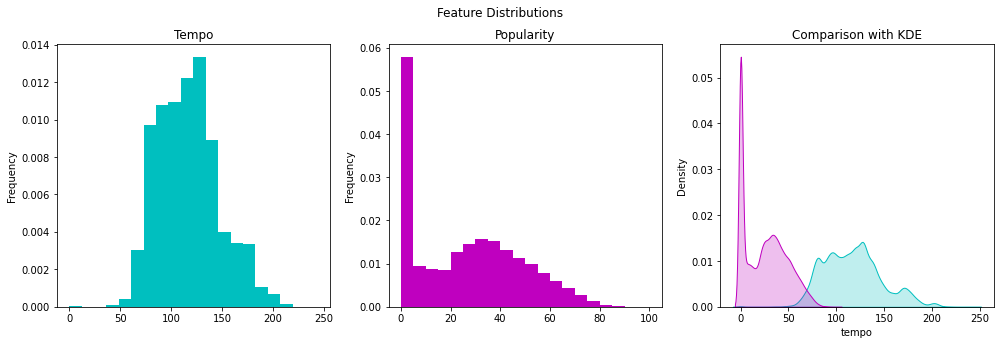

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
df['tempo'].plot(kind="hist", ax=ax[0], bins=20, label="tempo", color="c", density=True)
ax[0].set_title("Tempo")

df['popularity'].plot(kind="hist", ax=ax[1], bins=20, label="popularity", color="m", density=True)
ax[1].set_title("Popularity")

sns.kdeplot(df['tempo'], shade=True, label="Tempo", ax=ax[2], color="c")
sns.kdeplot(df['popularity'], shade=True, label="Popularity", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Feature Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
stats.ttest_ind(df_popularity['tempo'], df_popularity['popularity'], equal_var=False)

Ttest_indResult(statistic=1021.4169939672797, pvalue=0.0)

####Valence

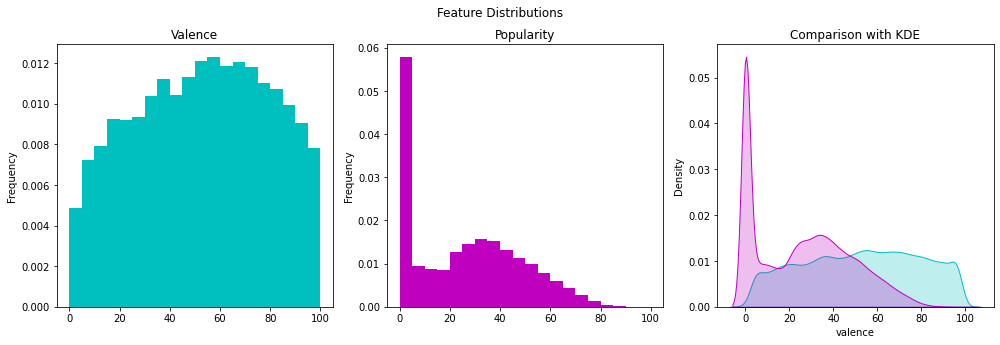

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
df['valence'].plot(kind="hist", ax=ax[0], bins=20, label="valence", color="c", density=True)
ax[0].set_title("Valence")

df['popularity'].plot(kind="hist", ax=ax[1], bins=20, label="popularity", color="m", density=True)
ax[1].set_title("Popularity")

sns.kdeplot(df['valence'], shade=True, label="Valence", ax=ax[2], color="c")
sns.kdeplot(df['popularity'], shade=True, label="Popularity", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Feature Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
stats.ttest_ind(df_popularity['valence'], df_popularity['popularity'], equal_var=False)

Ttest_indResult(statistic=-480.49398100993284, pvalue=0.0)

####**Interpreting results:**

> As p-values we obtained from all of the features are smaller than the threshold significance level 0.05, we can conclude that popularity of the songs are correlated with their features. Thus, we reject the null hypothesis.

###Features of 90s and 2000s

- **Null Hypothesis ($\large{H_0}$)**: There is no significant differences in terms of features between 90s and 2000s.
- **Alternative Hypothesis ($\large{H_A}$)**: Features of 90s and 2000s have significant differences.

Like the other case we set significance level as 0.05.

We will do our hypothesis testing on two different eras in terms of 5 different features. 
- Energy
- Popularity
- Loudness
- Instrumentalness
- Danceability

**Energy:**

In [ ]:
era_1_energy = df[df['year'] == 1990]['energy']
era_2_energy = df[df['year'] == 2000]['energy']

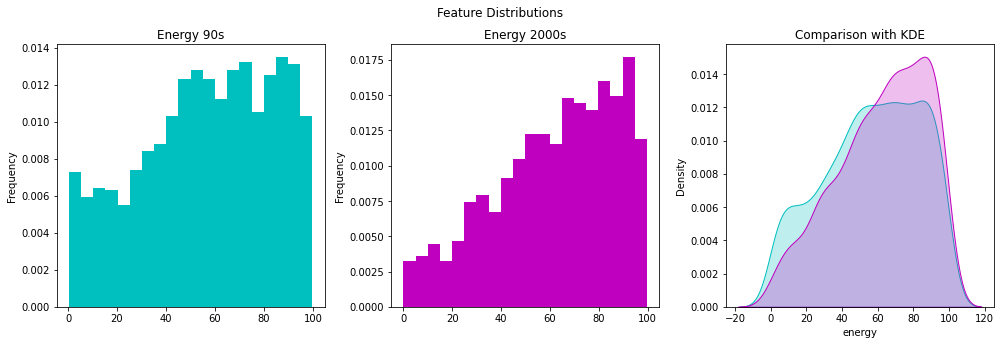

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
era_1_energy.plot(kind="hist", ax=ax[0], bins=20, label="Energy 90s", color="c", density=True)
ax[0].set_title("Energy 90s")

era_2_energy.plot(kind="hist", ax=ax[1], bins=20, label="Energy 2000s", color="m", density=True)
ax[1].set_title("Energy 2000s")

sns.kdeplot(era_1_energy, shade=True, label="Energy 90s", ax=ax[2], color="c")
sns.kdeplot(era_2_energy, shade=True, label="Energy 2000s", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Feature Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
stats.ttest_ind(era_1_energy, era_2_energy,equal_var=False)

Ttest_indResult(statistic=-5.738530646580991, pvalue=1.066806407616884e-08)

> Since pvalue is smaller than our significance level we reject the null hypothesis in terms of "energy" feature.

**Popularity:**

In [ ]:
era_1_popularity = df[df['year'] == 1990]['popularity']
era_2_popularity = df[df['year'] == 2000]['popularity']

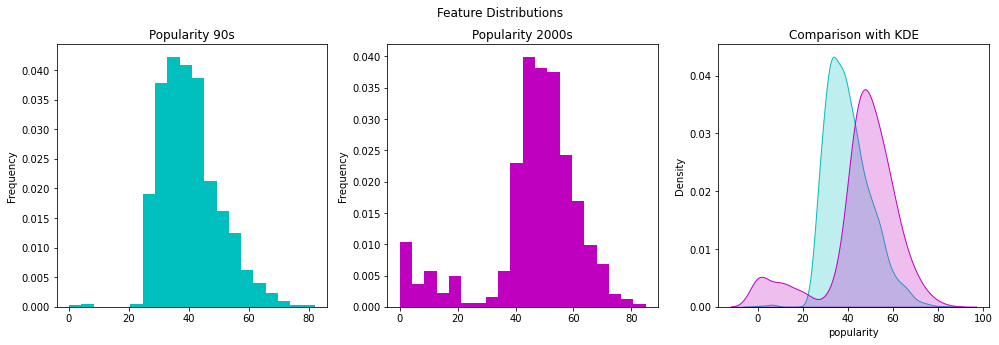

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
era_1_popularity.plot(kind="hist", ax=ax[0], bins=20, label="Popularity 90s", color="c", density=True)
ax[0].set_title("Popularity 90s")

era_2_popularity.plot(kind="hist", ax=ax[1], bins=20, label="Popularity 2000s", color="m", density=True)
ax[1].set_title("Popularity 2000s")

sns.kdeplot(era_1_popularity, shade=True, label="Popularity 90s", ax=ax[2], color="c")
sns.kdeplot(era_2_popularity, shade=True, label="Popularity 2000s", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Feature Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
stats.ttest_ind(era_1_popularity, era_2_popularity,equal_var=False)

Ttest_indResult(statistic=-11.53877338098402, pvalue=1.0902728261955251e-29)

> Similar to "energy" feature, the pvalue is significantly smaller than 0.05. Thus, we reject the null hypothesis.

**Loudness:**

In [ ]:
era_1_loudness = df[df['year'] == 1990]['loudness']
era_2_loudness = df[df['year'] == 2000]['loudness']

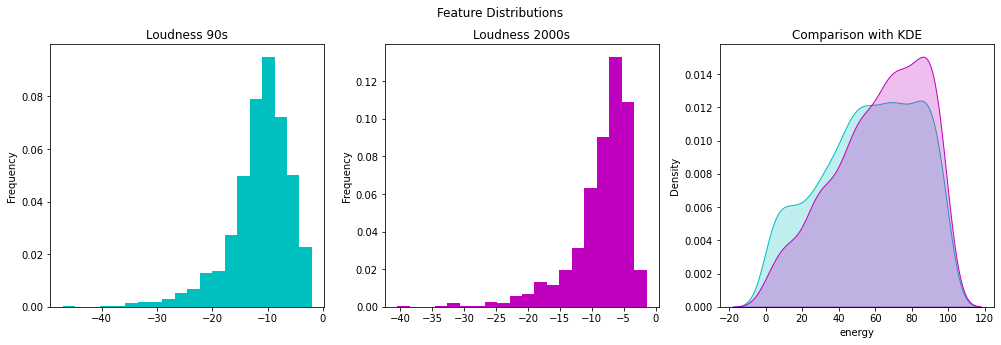

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
era_1_loudness.plot(kind="hist", ax=ax[0], bins=20, label="Loudness 90s", color="c", density=True)
ax[0].set_title("Loudness 90s")

era_2_loudness.plot(kind="hist", ax=ax[1], bins=20, label="Loudness 2000s", color="m", density=True)
ax[1].set_title("Loudness 2000s")

sns.kdeplot(era_1_energy, shade=True, label="Loudness 90s", ax=ax[2], color="c")
sns.kdeplot(era_2_energy, shade=True, label="Loudness 2000s", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Feature Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
stats.ttest_ind(era_1_loudness, era_2_loudness,equal_var=False)

Ttest_indResult(statistic=-16.024041685518988, pvalue=2.5463794713704014e-55)

> Pvalue is again very smaller than significance level, so we reject the null hypothesis.

**Instrumentalness:**

In [ ]:
era_1_instrumentalness = df[df['year'] == 1990]['instrumentalness']
era_2_instrumentalness = df[df['year'] == 2000]['instrumentalness']

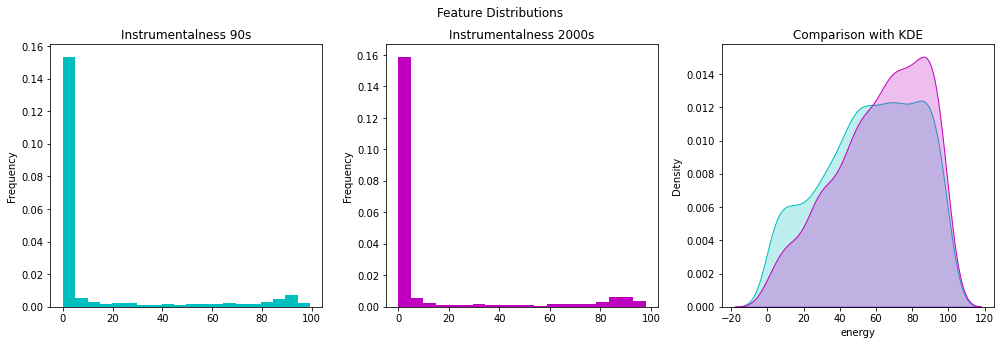

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
era_1_instrumentalness.plot(kind="hist", ax=ax[0], bins=20, label="Instrumentalness 90s", color="c", density=True)
ax[0].set_title("Instrumentalness 90s")

era_2_instrumentalness.plot(kind="hist", ax=ax[1], bins=20, label="Instrumentalness 2000s", color="m", density=True)
ax[1].set_title("Instrumentalness 2000s")

sns.kdeplot(era_1_energy, shade=True, label="Instrumentalness 90s", ax=ax[2], color="c")
sns.kdeplot(era_2_energy, shade=True, label="Instrumentalness 2000s", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Feature Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
stats.ttest_ind(era_1_instrumentalness, era_2_instrumentalness,equal_var=False)

Ttest_indResult(statistic=0.06966360217745186, pvalue=0.9444672419264747)

> Differently, pvalue of "instrumentalness" feature is greater than our significance level. Hence, we fail to reject the null hypothesis.

**Danceability:**

In [ ]:
era_1_danceability = df[df['year'] == 1990]['danceability']
era_2_danceability = df[df['year'] == 2000]['danceability']

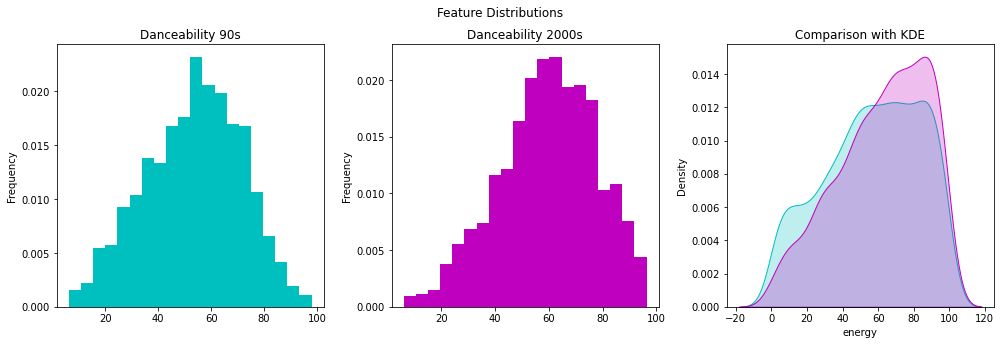

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))
        
era_1_danceability.plot(kind="hist", ax=ax[0], bins=20, label="Danceability 90s", color="c", density=True)
ax[0].set_title("Danceability 90s")

era_2_danceability.plot(kind="hist", ax=ax[1], bins=20, label="Danceability 2000s", color="m", density=True)
ax[1].set_title("Danceability 2000s")

sns.kdeplot(era_1_energy, shade=True, label="Danceability 90s", ax=ax[2], color="c")
sns.kdeplot(era_2_energy, shade=True, label="Danceability 2000s", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Feature Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
stats.ttest_ind(era_1_danceability, era_2_danceability,equal_var=False)

Ttest_indResult(statistic=-9.32088048793417, pvalue=2.5008597516985855e-20)

> Since, pvalue is greater than 0.05 we reject the null hypothesis for "danceability".

####Interpreting results:

> As we can observe from the pvalues we get, we can reject the null hypothesis for energy, popularity, loudness and danceability features. So, it is reasonable to conclude that there is significant different between 90s and 2000s regarding these features.

> However, we fail to reject the null hypothesis for instrumentalness as the pvalue is greater than 0.05. Hence, we conclude that there is not a significant difference between 90s and 2000s concerning instrumentalness. 

##Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

fname = "data.csv"
df_ml = pd.read_csv(join(path_prefix, fname))

Let's remember how was our actual dataset.

In [ ]:
df_ml.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


We assume that name, id, duration and release date of the songs do not contribute the popularity of the songs so we disregarded them.

In [ ]:
df_ml = df_ml.drop(["name", "id", "release_date"], axis = 1)
df_ml.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920


In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   instrumentalness  174389 non-null  float64
 7   key               174389 non-null  int64  
 8   liveness          174389 non-null  float64
 9   loudness          174389 non-null  float64
 10  mode              174389 non-null  int64  
 11  popularity        174389 non-null  int64  
 12  speechiness       174389 non-null  float64
 13  tempo             174389 non-null  float64
 14  valence           174389 non-null  float64
 15  year              174389 non-null  int64  
dtypes: float64(9), int64

>In our dataset all columns are numeric except 'artists' column which consists of string values. So, in order to use sklearn in our models we should encode them.

In [ ]:
encoder = OrdinalEncoder()
df_ml["artists"] = encoder.fit_transform(df_ml[["artists"]])
df_ml["artists"] = df_ml["artists"].astype(int)
df_ml.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.991000,21071,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
1,0.643000,303,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920
2,0.993000,21071,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920
3,0.000173,24517,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920
4,0.295000,22782,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920


###Decision Tree Model

In [ ]:
#determining features and target of the model
features_tree = df_ml.drop("popularity", axis = 1)
target_tree = df_ml["popularity"]

Now, we are going to split our dataset into three 80% training, 10% validation and 10% test.

In [ ]:
# 80% training, 20% for validation and testing
x_train_tree, x_remaining_tree, y_train_tree, y_remaining_tree = train_test_split(features_tree, target_tree, random_state=0, test_size=0.20)
# divide the remaining part into two
# at the end, you get 10% validation, 10% test
x_val_tree, x_test_tree, y_val_tree, y_test_tree = train_test_split(x_remaining_tree, y_remaining_tree, random_state=0, test_size=0.50)

In [ ]:
model_tree = DecisionTreeClassifier()

model_tree.fit(x_train_tree, y_train_tree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_tree = model_tree.predict(x_test_tree)

accuracy_score(y_test_tree, y_pred_tree)

0.22908423648144963

The accuracy of our model is 0.22914157921899192 when we do not interrupt with max_depth hyperparameter as we can see from above. 

In [ ]:
# cross validation function
from sklearn.model_selection import cross_val_score

# create a model
model = DecisionTreeClassifier(criterion="entropy")

# perform CV with the given settings
accuracies = cross_val_score(model, x_train_tree, y_train_tree, cv=5, scoring="accuracy")
accuracies

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



array([0.22126653, 0.22518099, 0.22105942, 0.2235682 , 0.22109526])

####Hyper-Parameter Tuning

Now, let's try to increase the performance of our decision tree model with hyperparameter tuning.

In [ ]:
model_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

Below, we are going to test our dataset with different max_depth values to observe accuracies and get the ideal hyperparameter value for our model. 

In [ ]:
max_depth_values = np.arange(1, 20)

train_set_accuracies = []
val_set_accuracies = []

for depth in max_depth_values:
  model = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
  model.fit(x_train_tree, y_train_tree)
  train_preds = model.predict(x_train_tree)
  val_preds = model.predict(x_val_tree)
  train_set_accuracies.append(accuracy_score(y_train_tree, train_preds))
  val_set_accuracies.append(accuracy_score(y_val_tree, val_preds))

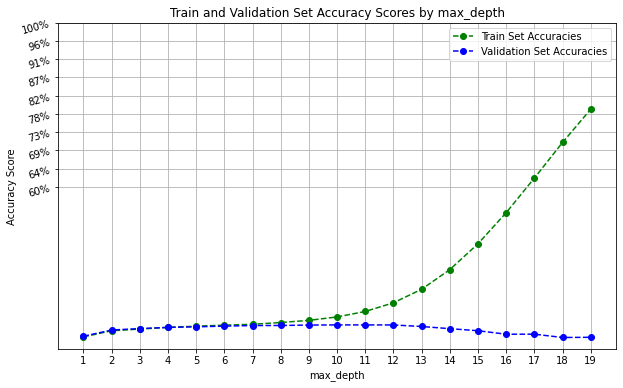

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

# the label/tick locations
x_ticks = np.arange(len(max_depth_values))
# yloc between 0.6-1
y_ticks = np.linspace(.6, 1.0, 10)
y_labels = [f"{val*100:.0f}%" for val in y_ticks]

ax.plot(train_set_accuracies, "go--", label = "Train Set Accuracies")
ax.plot(val_set_accuracies, "bo--", label = "Validation Set Accuracies")

ax.set_ylabel("Accuracy Score")
ax.set_xlabel("max_depth")
ax.set_title("Train and Validation Set Accuracy Scores by max_depth")
ax.set_xticks(x_ticks)
ax.set_xticklabels(max_depth_values)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.legend()

plt.yticks(rotation = 15)
plt.grid()
plt.show()

In [ ]:
model_tree = DecisionTreeClassifier(criterion="entropy", max_depth=9)

model_tree.fit(x_train_tree, y_train_tree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_tree = model_tree.predict(x_test_tree)

accuracy_score(y_test_tree, y_pred_tree)

0.26366190721945065

As we can see from the above, with max_depth value 9 we increased our model's accuracy from  0.229 to 0.264.

####Tree Visualization

Let's display the tree in text format:

In [ ]:
# the required utility function
from sklearn.tree import export_text

# execute and print the ouput
print(export_text(model_tree, feature_names=list(features_tree.columns)))

|--- year <= 1955.50
|   |--- year <= 1948.50
|   |   |--- artists <= 10497.50
|   |   |   |--- artists <= 3726.50
|   |   |   |   |--- artists <= 183.50
|   |   |   |   |   |--- artists <= 53.50
|   |   |   |   |   |   |--- danceability <= 0.59
|   |   |   |   |   |   |   |--- speechiness <= 0.05
|   |   |   |   |   |   |   |   |--- energy <= 0.23
|   |   |   |   |   |   |   |   |   |--- class: 12
|   |   |   |   |   |   |   |   |--- energy >  0.23
|   |   |   |   |   |   |   |   |   |--- class: 13
|   |   |   |   |   |   |   |--- speechiness >  0.05
|   |   |   |   |   |   |   |   |--- duration_ms <= 163766.50
|   |   |   |   |   |   |   |   |   |--- class: 9
|   |   |   |   |   |   |   |   |--- duration_ms >  163766.50
|   |   |   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |--- danceability >  0.59
|   |   |   |   |   |   |   |--- liveness <= 0.19
|   |   |   |   |   |   |   |   |--- tempo <= 83.70
|   |   |   |   |   |   |   |   |   |--- class: 9
|   |   |   |   

### Random Forest Regression




In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

var = ['year', 'danceability', 'energy', 'loudness', 'tempo']# In order to guess popularity these variable decided to check.
data = df_popularity.copy()
important_var = df_popularity[var]

normalize = StandardScaler()
normalize.fit(important_var)
important_var = normalize.transform(important_var)

print(important_var.shape) 

(174389, 5)


We decided that to be important variables to check popularity as 'year', 'danceability', 'energy', 'loudness', 'tempo'

In [ ]:
y = df_popularity["popularity"].values

from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(important_var, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
RandomForest_score=rf.score(X_test,y_test)
print("Training Accuracy :", rf.score(X_train, y_train))
print("Validation Accuracy :", rf.score(X_test, y_test))

print("F1 score :", f1_score(y_test, y_pred,average='macro'))
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)


Training Accuracy : 0.991240834056096
Validation Accuracy : 0.2630024657377143
F1 score : 0.048399097086756174
              precision    recall  f1-score   support

           0       0.63      0.95      0.76      8246
           1       0.42      0.16      0.23       757
           2       0.23      0.06      0.10       428
           3       0.22      0.09      0.12       378
           4       0.18      0.08      0.12       307
           5       0.20      0.13      0.16       340
           6       0.19      0.10      0.13       317
           7       0.19      0.10      0.13       356
           8       0.18      0.12      0.14       358
           9       0.10      0.08      0.09       347
          10       0.11      0.07      0.09       334
          11       0.08      0.08      0.08       312
          12       0.10      0.09      0.09       317
          13       0.08      0.08      0.08       303
          14       0.10      0.08      0.09       322
          15       0.07 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Random Forest Regressor Training with HyperParameter Tuning

In [ ]:
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

rf.fit(X_train,y_train)
predictions_rf = rf.predict(X_test)
errors = abs(predictions_rf - y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rf)))

Mean Absolute Error: 9.040066770343838
Mean Squared Error: 180.7174813021649
Root Mean Squared Error: 13.443120221963534


We evaluated our model by finding the mean absolute error, mean squared error 
and root mean squared error produced by the model.
When we look at our mean absolute error, it is 9.03 which means our average error is 9.03 (below or above the mean). And our mean squared error is 180.75,  Our root mean squared error is 13.44 with the random forest regression with hyper parameter tuning , it shows how concentrated the data is around the best fit.



#### Random Forest Regressor Training without HyperParameter Tuning

In [ ]:
rf=RandomForestRegressor(n_estimators = 10, random_state = 42)
rf.fit(X_train,y_train)


pred_rf = rf.predict(X_test) #We use the predict method on test data 
errors = abs(pred_rf - y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))

Mean Absolute Error: 9.332526383580028
Mean Squared Error: 200.53738960278554
Root Mean Squared Error: 14.161122469733307


It can be clearly see that the HyperParameter Tuning traning gives better value than the non HyperParameter Tuning.

In [ ]:
#Assume pixels are our features. Model has 8x8=64 features. Create a list with length 64 where each element stands for one pixel.
feature_list = list(range(df.shape[1]))

# Get importance list from model
importances = list(rf.feature_importances_)

# Create list of tuples by combining(zip) feature list and and importance list 
feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort features by importance
feature_importances = sorted(feature_importance, key = lambda x: x[1], reverse = True)

# Print top 5 features 
for pair in feature_importances[:5]:
  print("Variable: {:2}   Importance: {}".format(*pair))

Variable:  0   Importance: 0.53
Variable:  3   Importance: 0.14
Variable:  2   Importance: 0.13
Variable:  4   Importance: 0.11
Variable:  1   Importance: 0.1


Text(0.5, 1.0, 'Feature Importances')

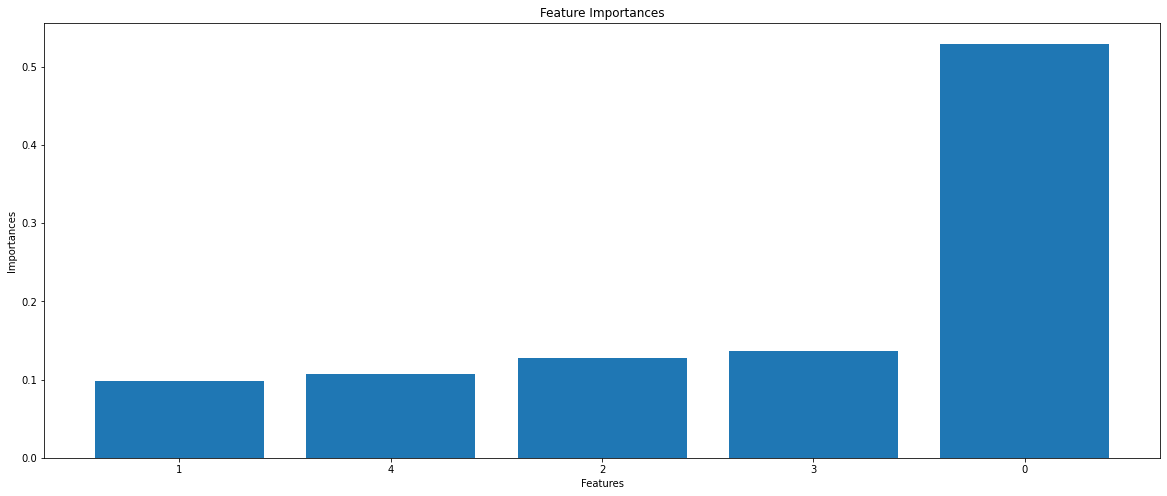

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
index=np.argsort(importances)
arr_sorted=[]
for i in index:
  arr_sorted.append(importances[i])

x=np.arange(0,len(importances))
ax.set_xticks(x)
ax.set_xticklabels(index)
ax.bar(x,arr_sorted)
plt.xlabel("Features")
plt.ylabel("Importances")
plt.title("Feature Importances")

###Song Recommendation System

We will create a simple song recomentation model.

In [ ]:
from sklearn.neighbors import NearestNeighbors
df_nn = df.copy()
df_nn = df_nn.drop(["year", "id", "release_date"], axis = 1)
df_nn.head()

,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,duration
0,99.1000,Mamie Smith,59.8,22.4,0,0.05220,5,37.90,-12.628,0,Keep A Song In Your Soul,12,9.36,149.976,63.40,168
1,64.3000,Screamin' Jay Hawkins,85.2,51.7,0,2.64000,5,8.09,-7.261,0,I Put A Spell On You,7,5.34,86.889,95.00,150
2,99.3000,Mamie Smith,64.7,18.6,0,0.00176,0,51.90,-12.098,1,Golfing Papa,4,17.40,97.600,68.90,164
3,0.0173,Oscar Velazquez,73.0,79.8,0,80.10000,2,12.80,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,4.25,127.997,4.22,422
4,29.5000,Mixe,70.4,70.7,1,0.02460,10,40.20,-6.036,0,Xuniverxe,2,7.68,122.076,29.90,165


In [ ]:
encoder = OrdinalEncoder()
df_nn["artists"] = encoder.fit_transform(df_nn[["artists"]])
df_nn.head()

,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,duration
0,99.1000,20900.0,59.8,22.4,0,0.05220,5,37.90,-12.628,0,Keep A Song In Your Soul,12,9.36,149.976,63.40,168
1,64.3000,28375.0,85.2,51.7,0,2.64000,5,8.09,-7.261,0,I Put A Spell On You,7,5.34,86.889,95.00,150
2,99.3000,20900.0,64.7,18.6,0,0.00176,0,51.90,-12.098,1,Golfing Papa,4,17.40,97.600,68.90,164
3,0.0173,24395.0,73.0,79.8,0,80.10000,2,12.80,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,4.25,127.997,4.22,422
4,29.5000,22630.0,70.4,70.7,1,0.02460,10,40.20,-6.036,0,Xuniverxe,2,7.68,122.076,29.90,165


We normalize our dataset to get more accurate result from the Nearest Neighbour Model.

In [ ]:
df_norm = (df_nn.drop(["name"], axis=1) - df_nn.drop(["name"], axis=1).min()) / (df_nn.drop(["name"], axis=1).max() - df_nn.drop(["name"], axis=1).min())
df_norm.head()

,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,duration
0,0.994980,0.577444,0.605263,0.224,0.0,0.000522,0.454545,0.3790,0.741868,0.0,0.12,0.096395,0.615900,0.6340,0.030564
1,0.645582,0.783970,0.862348,0.517,0.0,0.026400,0.454545,0.0809,0.825918,0.0,0.07,0.054995,0.356823,0.9500,0.027189
2,0.996988,0.577444,0.654858,0.186,0.0,0.000018,0.000000,0.5190,0.750168,1.0,0.04,0.179197,0.400810,0.6890,0.029814
3,0.000174,0.674007,0.738866,0.798,0.0,0.801000,0.181818,0.1280,0.825135,1.0,0.17,0.043769,0.525640,0.0422,0.078192
4,0.296185,0.625242,0.712551,0.707,1.0,0.000246,0.909091,0.4020,0.845102,0.0,0.02,0.079094,0.501324,0.2990,0.030002


Now, we will ask from the user to enter the name of the song which the user wants to get recomendation similar to that song.

In [ ]:
name_of_song = input("Please enter the name of the song: ")
X = df_nn.loc[df_nn["name"] == name_of_song]
X = X.drop(["name"], axis=1)

Please enter the name of the song: Back In Black


The user should enter the number that the model will recommend.

In [ ]:
n = input("Enter the number of song: ")

Enter the number of song: 3


In [ ]:
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(df_norm) 
NearestNeighbors(algorithm='auto', leaf_size=30)
Y = neigh.kneighbors(X, return_distance=False)
Y

array([[92953, 55477, 55475]])

In [ ]:
print("These are the songs we recommend to you:")
for i in Y:
  for x in i:
    print(df_nn.iloc[x]["name"])

These are the songs we recommend to you:
New Year's Eve 2015 Party Hits - Full DJ Party Mix
The Best of Chillifunk Ten Years 1996-2006 (Notenshun Bonus DJ Mix)
The Best of Chillifunk Ten Years 1996-2006 (Notenshun Bonus DJ Mix)
